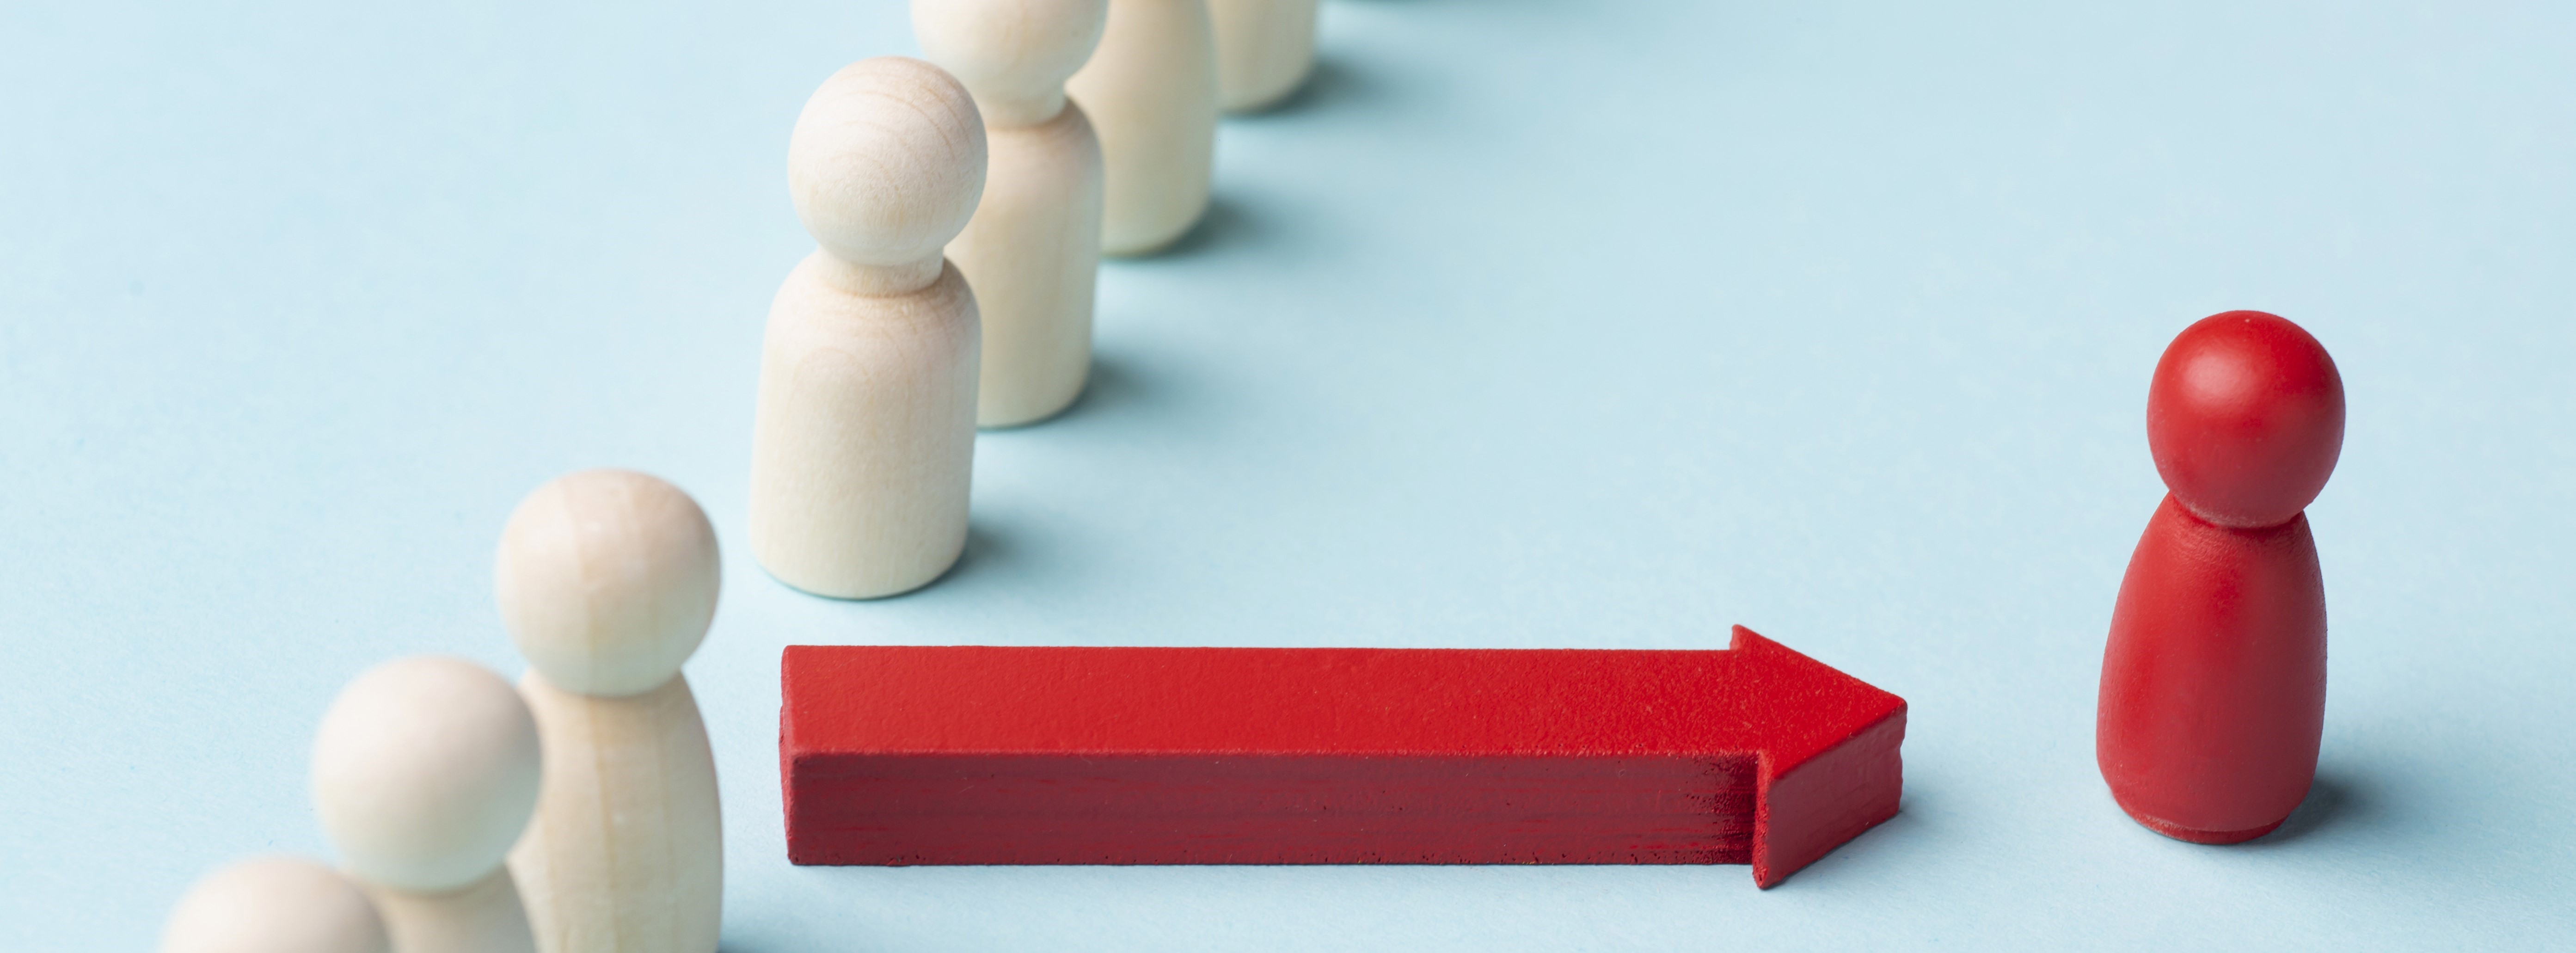

# **Predicting Customer Churn in Telecom Company**

### Background 
Customer churn has been a focus of business analytics that service providers pay attention to manage profitability of their businesses. Churn expectation is valuable for sales projection and for the creation of promotional programs to attract customers of less probability for churn as well as to retain existing customers. For the telecom company customer data in this project, *customer churn* is defined as *the group that left the service in the last month*. The dataset includes customer information with each individual represented as a row and each column includes relevant information such as demographic attributes, types of other services they consume, and customer account information (payment method, charges etc.)

Because of the importance of predicting and further minimizing custerom churn, conducting this project to learn and practice Machine learning task for the binary classification does have real-world implication, which is applicable to customer analyses across industries. 


* Project type: **Binary classification with supervised learning**.

* Data set link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

============== Content Overview ============== 

1. Setup
2. Data exploration
3. Data preprocessing  
4, Resolving biased data set: Oversampling vs Undersampling
5. Building and Deploying Machine Learning models - Parameter tuning (GridSearchCV), Model evaluation (Confusion matrix, AUC curve)
    1. Random Forest
    2. Logistic Regression
    3. XGBoost
   
6. Error analyses

=============================================

# 1. Setup
### 1-1 Import Libraries

In [2]:
###Libraries
#Basic statistic, data presentation library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") #sns style


#data processing
from sklearn.preprocessing import MinMaxScaler

#Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, accuracy_score, plot_roc_curve, auc 


#etc.
import warnings
warnings.filterwarnings("ignore")
#warnings.simplefilter(action='ignore', category=FutureWarning)

### 1-2 Read data

In [3]:
original_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=original_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Exploration

### 2-1 Data Cleaning
First, I'll check the basic information of the data and make essential changes if needed. Specifically what I did in the following lines are: 
* Check shape, columns of the data
* Make the formatting of the columns uniform
* Modify data type
* Check missing values

In [4]:
#Check basic data shape
df.shape

(7043, 21)

In [5]:
#data features
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#rename because inconsistent capitalization
#'only tenure' and 'gender' start with lower-case 
df = df.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

In [7]:
#check feature names again
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#overall column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Check data types for each column
#Incorrect type of 'TotalCharges' 
#Turn from object to be numeric
df.dtypes

customerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#change TotalCharges column from object to numeric type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
#now TotalCharges is numeric type
#But 'SeniorCitizen' does have to be a integer : change from integer to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df.dtypes

customerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
#check null values
#There are 11 null values in TotalCharges 
df.isnull().sum()

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#not sure whether missing values in the MonthlyCharges column are  0 or not
# chose to drop as there are only 11 rows
df.dropna(inplace=True)

In [14]:
#no more missing values
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#drop customer ID as they are all distinct and provide no predictive value
df.drop(['customerID'], axis=1, inplace=True)

In [16]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2-2 Exploring the target value distribution
After basic cleaning, I will first check the distribution of the target column.
It turns out that the downloaded data is imbalanced sample. I will handle it by oversampling after pre-processing. I chose over-sampling as a primary choice because the number of sample instances is 7032, which is not very sufficient.

In [17]:
#target column class - imbalanced
# churn = 1 : minority class
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

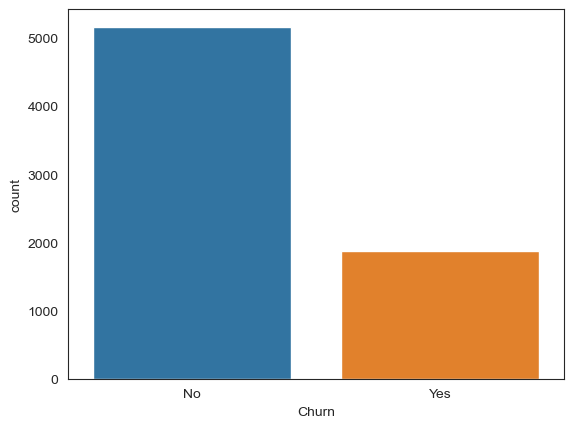

In [18]:
#sns plot to show churn class count
#Imbalanced sample, poor performance on 'yes' class is expected
# With less than 2500 samples in 'yes' class, I will do oversampling

sns.set_style('white')
ax = sns.countplot(x="Churn", data=df)

### 2-3 Exploring the feature distribution of other columns


### **Categorizing feature columnes**


Because there are multiple features, it could be very helpful to categorize the type of information in the data exploration stage.
With the hint from the data source, we can divide data into three groups and further separate numeric columns

a. **Demographic info** 
    * 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'

b. **Customer account info** 
    * 'Tenure', 'Contract', 'PaperlessBilling', PaymentMethod', 'MonthlyCharges', 'TotalCharges'

c. **Other service info that cutomer signed up** 
    * 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
    
d. **Numeric columns**
    * Because there are only three numerical columns, 'Tenure', "MonthlyCharges', and 'TotalCharges', we can more easily explore numeirca columns separately.

I'll explore the general distribution of these features in the provided data, and how their distribution seems to differ according to the customer churn


In [19]:
#First, make a categorized list of column names for convenience
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
#list of the column names of demongraphic information
demo_info = list(df.columns[:4])
demo_info

['Gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [21]:
#subset list with the column names with service information
service_info=list(df.columns[4:-6])
service_info

['Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [22]:
#subset list with the column names with account information
account_info=list(df.columns[-6:-1])
account_info

['Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

Here, I'll explore the columns with demographic information, first looking at general distribution in the data set, and then focusing on its potential relationship with the target 'Churn' value.

### a-1 Demographic information

Following are rough implications from the exploratory search
* There are similar number of male and female. Gender is not very associated with targets
* There are less senior citizens
* Whether they have partners do not have significant different in target values
* More people not have dependents

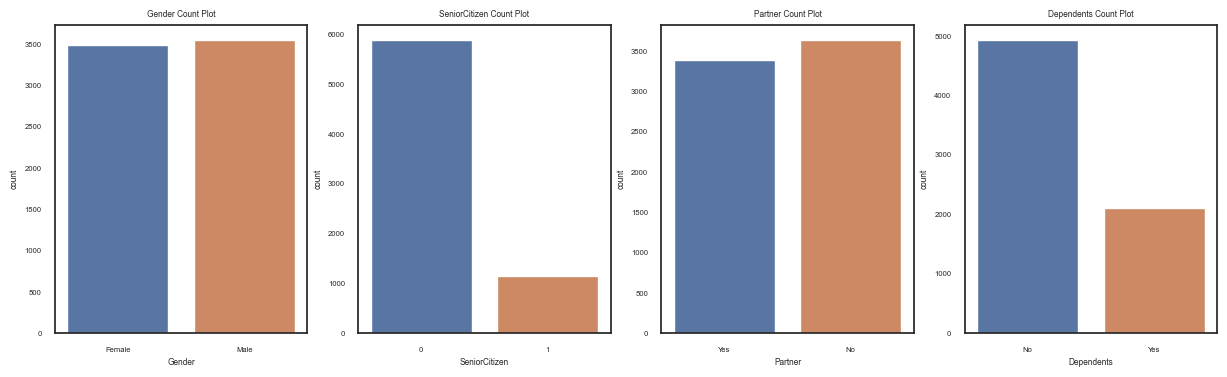

In [23]:
#Visualizing the Distribution of demo info columns

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(1,len(demo_info),figsize=(15,4))
for i , col in enumerate(demo_info):
        sns.countplot(
                     data=df, 
                      x=col,
                      ax=ax[i]
                      )
        ax[i].set_title(f'{col} Count Plot')

plt.show()

### a-2 Demographic information & Churn

Then, I find out general trend of how churn is associated with these columns in examination.
* There are no big gender difference
* Senior citizens are more likely to churn
* Those without partners are more likely to churn
* Those without dependents are more likely to churn

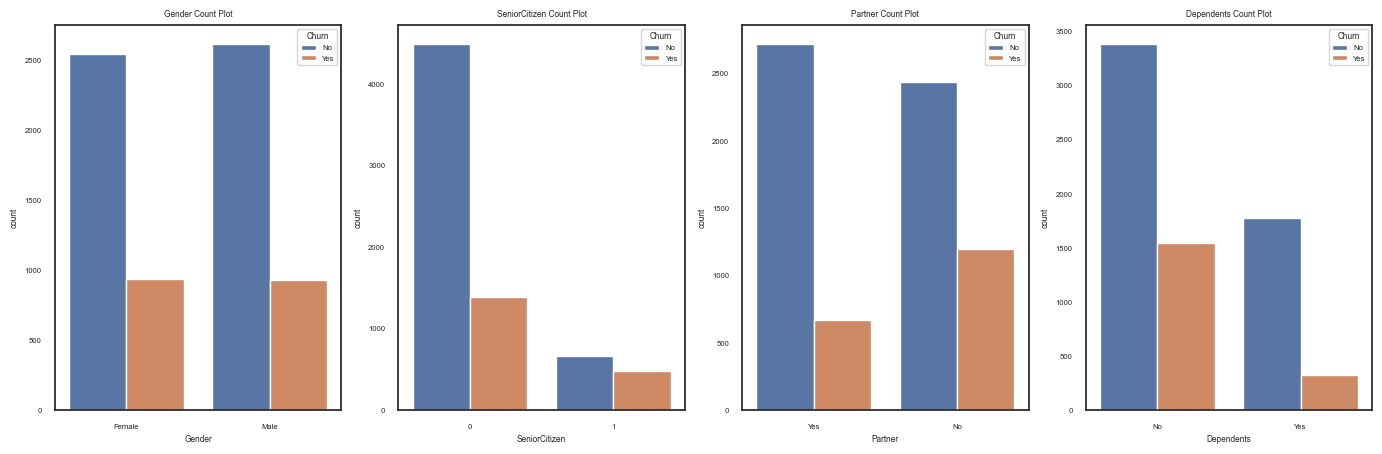

In [24]:
#Visualizing the demographic information distribution, depending on Churn

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(1,len(demo_info),figsize=(17,5))
for i , col in enumerate(demo_info):
        sns.countplot(
                     data=df,
                      x=col,
                      ax=ax[i],
                      hue='Churn'
                    
                      )
        ax[i].set_title(f'{col} Count Plot')

plt.show()

### b-1 Service Information

Similarly, I will explore columns belong to 'service_info'
As noted previously, I excluded 'Tenure' column as it is the only continuous value here. As a reminder, There are only 3 columns with numeric values ('Tenure', 'MonthlyCharges', 'TotalCharges'). I'll explore them all together

These are notes from my general exploration:
* There are some categorical values that needs to be merged (e.g., 'No phone service' could be coded as 'No' in 'MultipleLines' column)
* Many customers do not use Online Security, Online Backup, Device Protection and so on

In [25]:
#check the columns belong to the 'service_info'
service_info

['Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [26]:
#exclude 'Tenure'. I'll explore numerical columns separately
service_info_categorical = service_info[1:]
service_info_categorical

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

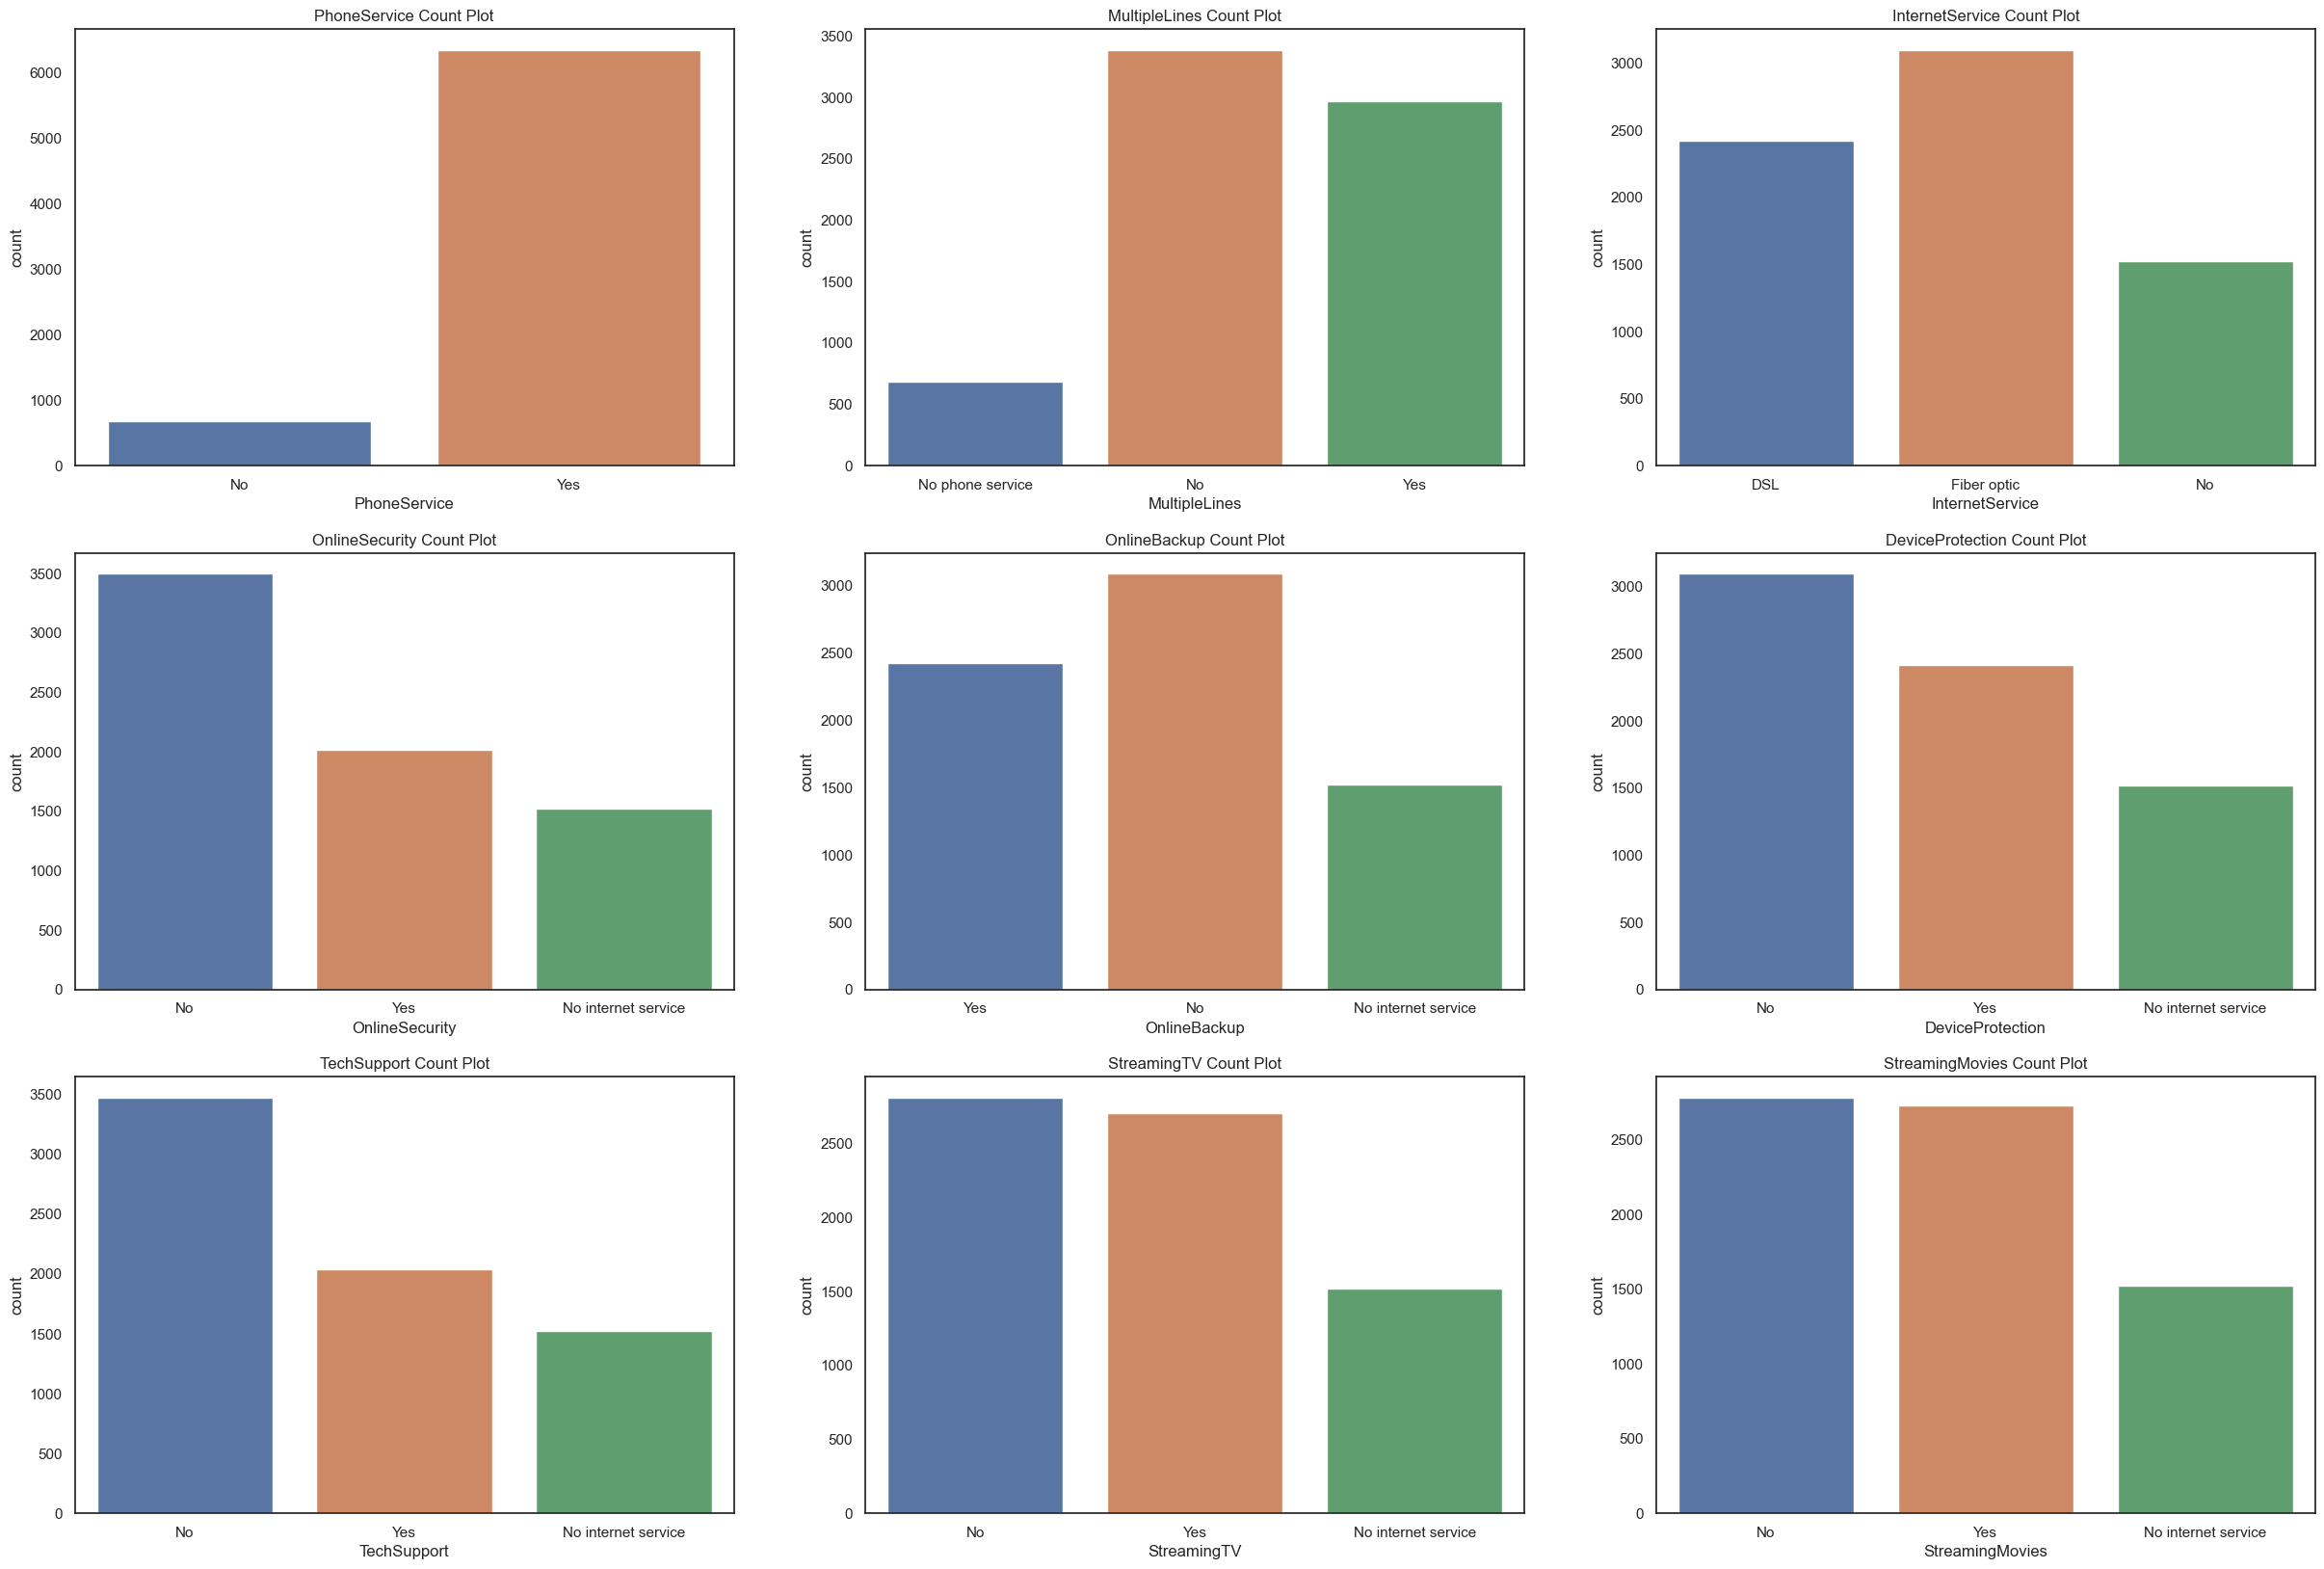

In [27]:
#Visualize the general exploration about distribution in each service_info columns

sns.set(font_scale=1, style="white")
fig , ax = plt.subplots(3, 3, figsize=(30,20))
for i , col in enumerate(service_info_categorical):
        sns.countplot(
                     data=df,
                      x=col,
                      ax=ax[i//3, i%3]
                      )
        ax[i//3, i%3].set_title(f'{col} Count Plot')

plt.show()


### b-2 Service Information & Churn

When considering together with Churn/no-Churn customers, these are rough insights from observing the results below

* There are more percentage of churned customers who used 'Fiber optic' Internet service
* Bigger percentage of customers without Online Security / Online Backup / Device protection tend to churn
* 'Streaming TV', 'Streaming Movies' are very relevant to churn

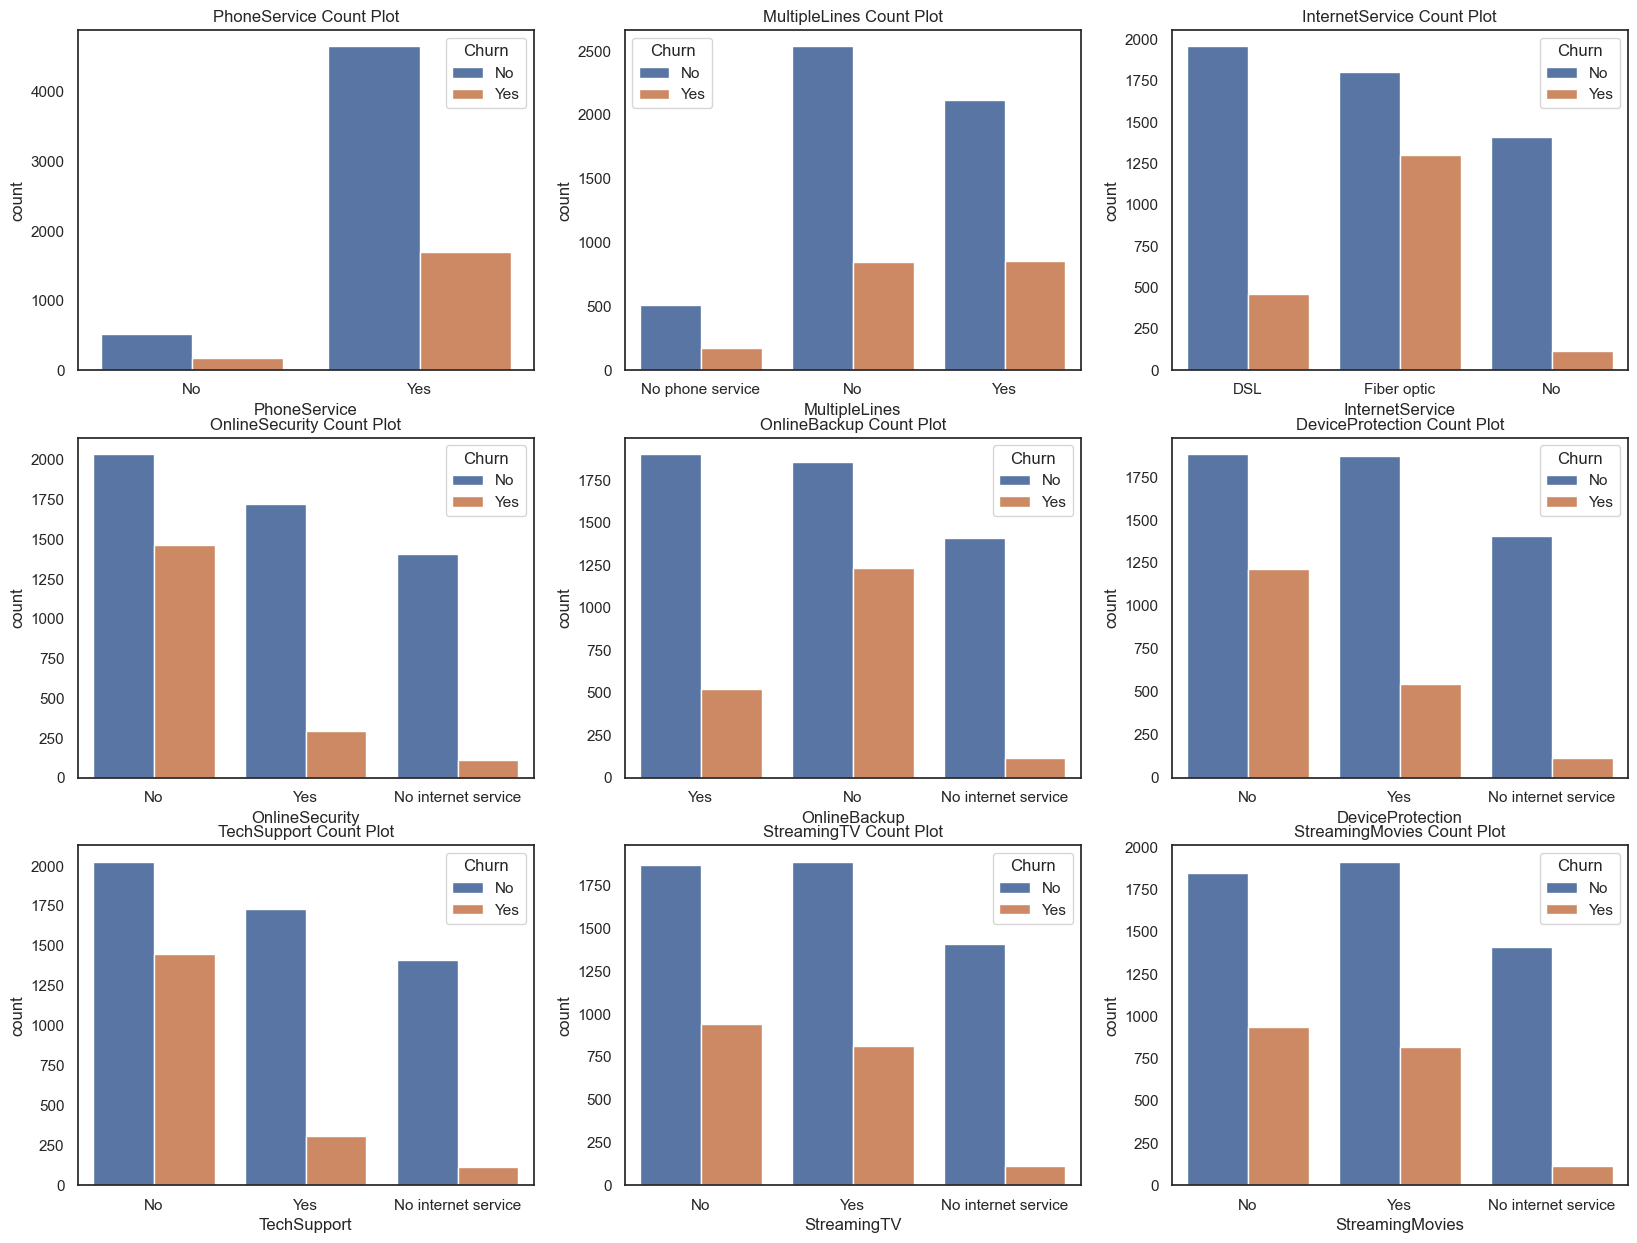

In [28]:
#Visualize how service information is associated with, ore showing some patterns by Churn (0,1)
    
sns.set(font_scale=1, style="white")    
fig , ax = plt.subplots(3, 3, figsize=(20,15))
for i , col in enumerate(service_info_categorical):
        sns.countplot(
                     data=df,
                      x=col,
                      hue='Churn',
                      ax=ax[i//3, i%3]
                      )
        ax[i//3, i%3].set_title(f'{col} Count Plot')

plt.show()

### c-1 Account information

General exploration shows that:
* More customers use month-to-month plans
* More customers use paperless billing
* There are 4 payment method. Electronic check is most frequent, not much difference in other categories

In [29]:
#Check the list of columns
account_info

['Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [30]:
#Only limiting to categorical values. I'll explore numerical values together after this exploration
account_category=account_info[:3]

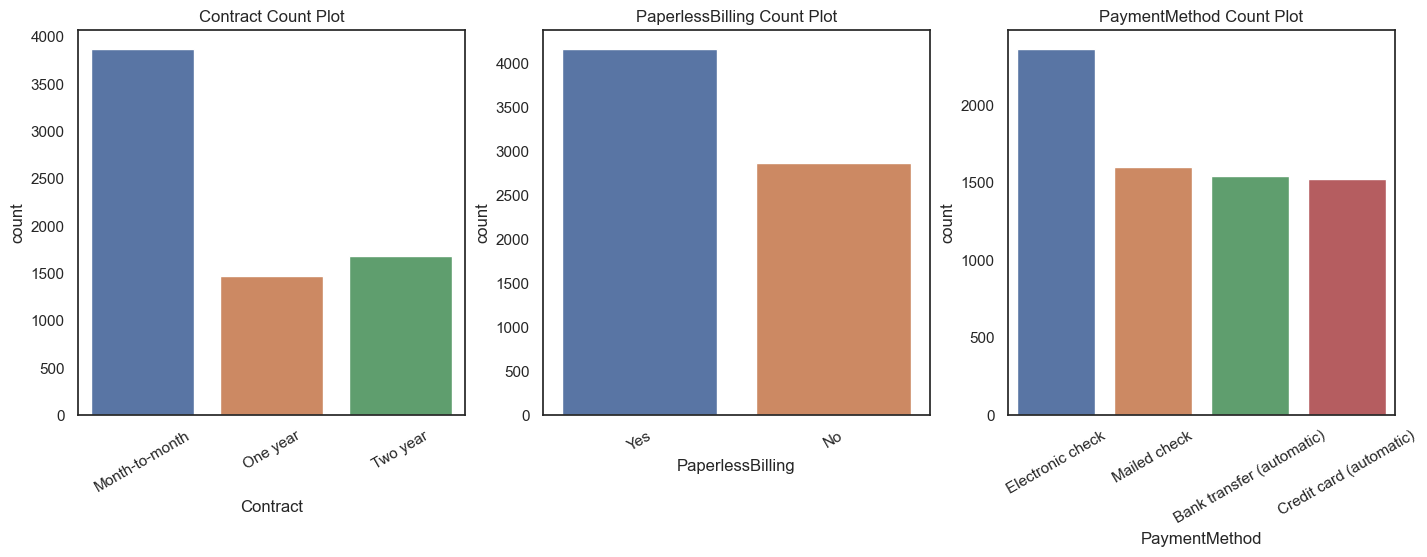

In [31]:
#Distirubtion of account_info columns

fig , ax = plt.subplots(1,len(account_category),figsize=(17,5))
for i , col in enumerate(account_category):
        sns.countplot(
                     data=df,
                       x=col,
                       ax=ax[i]
                      )
        ax[i].set_title(f'{col} Count Plot')
        ax[i].tick_params(axis='x', rotation=30)

plt.show()


### c-2 Account Information & Churn

Likewise, exploratory analyses hints that:
* Customers with Month-to-month plans are far more likely to churn
* Customers using Paperless billing is more likely to churn, but not much difference
* Customers useing Electronic check are more likely to churn, compared with other groups using alternative method

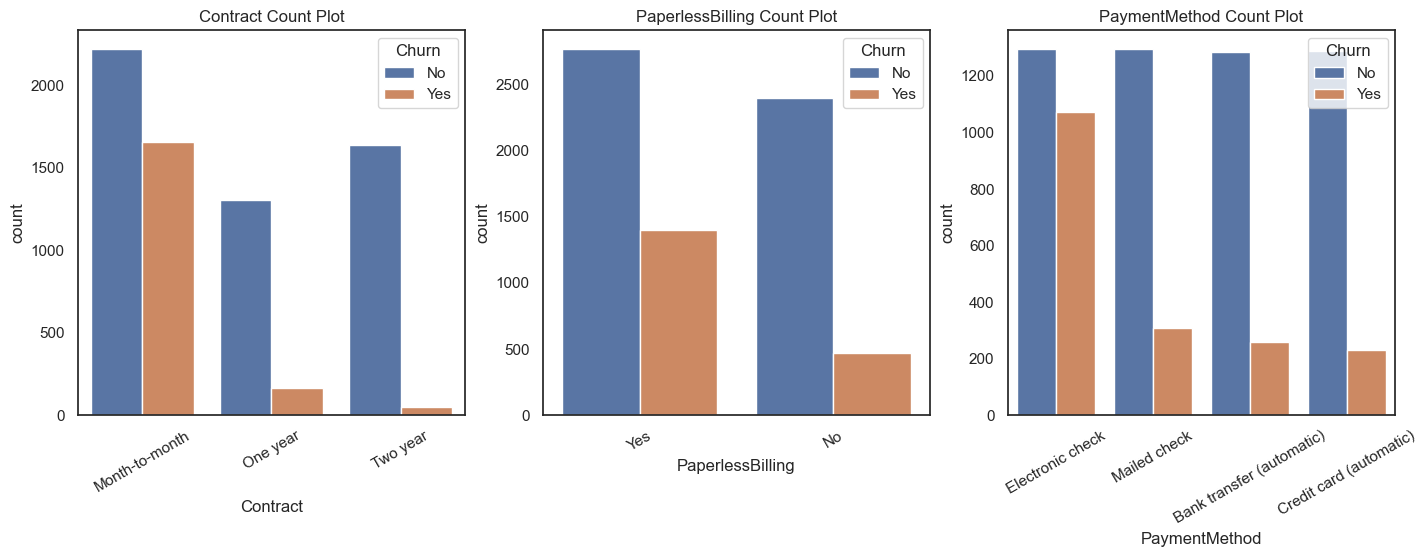

In [32]:
#account information column distribution, by churn

fig , ax = plt.subplots(1,len(account_category),figsize=(17,5))
for i , col in enumerate(account_category):
        sns.countplot(
                     data=df,
                       x=col,
                       ax=ax[i],
                       hue='Churn'
                      )
        ax[i].set_title(f'{col} Count Plot')
        ax[i].tick_params(axis='x', rotation=30)

plt.show()


### d. Exploration of numerical columns 

Three columns named as 'Tenure', 'Monthly charges', 'Total charges & Churn' are only numerical columns in the data. That is, among 19 features, 16 variables are categorical.I choose density plot (kde) to learn about their existing pattern and difference. From a simple exploration, it is assumed that:

* Customers with shorter 'Tenure' are moer likely to Churn
* Customers with higher 'MonthCharges' are more likely to Churn
* It is a general trend that there are more customers in the lower 'TotalCharges' bucket. Many churned customers are from the low 'TotalCharges' group, though it is not clear how to differentiate churn/not churn groups
    

In [33]:
#Check again about the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


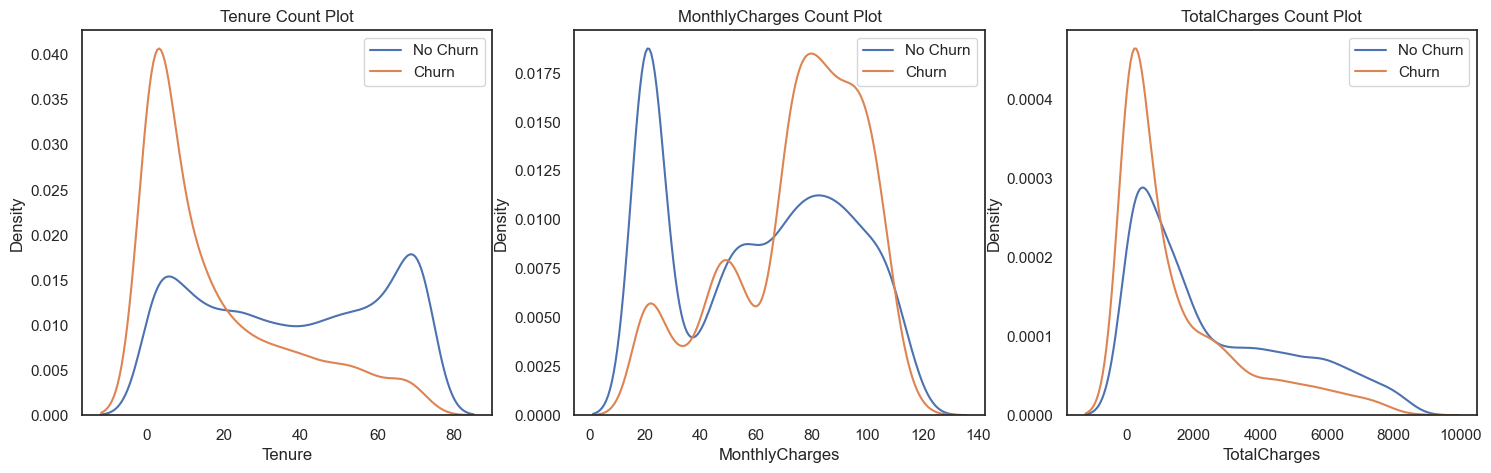

In [34]:
#There are 3 numeric features
#Plot continuous probability density using KDE plot
#Different distribution between churn/no-churn group

numeric_col = ['Tenure', 'MonthlyCharges', 'TotalCharges']
labels = 'No Churn', 'Churn'

fig, ax = plt.subplots(1, len(numeric_col), figsize=(18, 5))
for i, col in enumerate(numeric_col):
    plt.title("KDE plot for {}".format(col))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][col].dropna(), ax=ax[i])
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][col].dropna(), ax=ax[i])
    ax[i].set_title(f'{col} Count Plot')
    ax[i].legend(labels)



<AxesSubplot: >

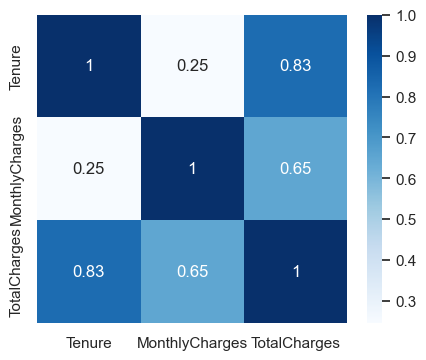

In [35]:
#correlation plot between numerical columns
#There seems to be significant correlation between Tenure & TotalCharges

sns.set(font_scale=1)
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

### Data exploration summary 

From the data exploration, I could assume following features to be meaningfully associated with customer churn:
* Demographic info: 'Partner', 'Dependents'
* Service info: InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
* Account info: 'Tenure', 'Contract', 'PaymentMethod'

However, I can only make a brief guess about the relationship of these features with the customer Churn.
As there are multiple features and numerous combinations of features to associated with Churn, it is wiser to utilize ML algorithms to learn and make predictions.



# 3. Data pre-processing

From the data exploration, we could see that majority of columns have two categorical values that needs binary encoding to be properly recognized by ML algorithms. 
There were multiple columns where some values needs to be merged. Also, there were columns with more than 2 categorical values which requires pre-processing as well (e.g., introducing dummies, one-hot-encoding).

Following tasks are performed in the pre-processing stage:
1. Examine categorical values of each column and merge values if possible
2. Replace binary categorical values into binary encoding, and
3. Introduce dummies for the columns with 3 or more values.

## 3-1 Merge categorical values without additional information

First, I print out unique values for each column to see whether there are columns needs reshaping or replacing values.

From observation, there are some values within one column that does not add meaningful information. For example, 'No phone service' value in the 'Onlinesecurity',column has not much difference with 'No' value. Distinguishing between them does not add meaningful information about customer's 'Onlinesecurity' status.  Similar cases are observed in 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies' columns. 'MultipleLines' has a similar issue as there are separate values of'No internet service' and 'No'. I replaced the values with 'No' value.

In [36]:
#Print out unique values for each column to find out how to encode categorical values
#Don't have to print columns with continuous numeric values = only print out 'Object' type columns

for i in df.columns:
    if df[i].dtypes == "object":
        print(f"{i}:")
        print(df[i].value_counts())
        print("======================= \n")
        

Gender:
Male      3549
Female    3483
Name: Gender, dtype: int64

SeniorCitizen:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

DeviceProtection:
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

TechSupport:
No

In [37]:
#replace 'No internet service' and 'No phone service' with 'No'

df.replace(
{
    'No internet service': 'No',
    'No phone service': 'No'
}, 
    inplace = True)

In [38]:
# check values for each columns again
# Now there are not redunedant/meaningless values
for i in df.columns:
    if df[i].dtypes == "object":
        print(f"{i}:\n")
        print(df[i].value_counts())
        print("=======================\n")
        

Gender:

Male      3549
Female    3483
Name: Gender, dtype: int64

Partner:

No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents:

No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService:

Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines:

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

InternetService:

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity:

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

OnlineBackup:

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

DeviceProtection:

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

TechSupport:

No     4992
Yes    2040
Name: TechSupport, dtype: int64

StreamingTV:

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

StreamingMovies:

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

Contract:

Month-to-month    3875
Two year          1685
One year          1472
Name: 

## 3-2 Binary encoding 
For those columns with binary values, replace values with 0 and 1.
Specifically, I replaced (Male, Female) with (0,1) and (No, Yes) with (0,1)

In [39]:
#Before encoding 'Gender' column
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
#'Gender' binary encoding
df['Gender'].replace({'Male':0, 'Female':1},inplace=True)
df.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
#Yes/No binary encoding 
#apply to overall columns
df.replace({'Yes':1, 'No':0},inplace=True)
df.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## 3-3 One-hot-encoding  
For those columns with more than 2 categorical values, apply one-hot-encoding. As all columns with binary values are turned into numeric columns in the previous stage, the remaining object-type columns are the target columns.

In [42]:
#check the columns and values to apply one-hot-encoding
for i in df.columns:
    if df[i].dtypes == "object":
        print(f"{i}:\n")
        print(df[i].value_counts())
        print("=======================\n")

InternetService:

Fiber optic    3096
DSL            2416
0              1520
Name: InternetService, dtype: int64

Contract:

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

PaymentMethod:

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64



In [43]:
#One-hot encoding 
one_hot_encoding_col = ['InternetService' ,'Contract' ,'PaymentMethod']
df_encoded = pd.get_dummies(data=df, columns= one_hot_encoding_col)

In [44]:
#check one-hot-encoding 
#categorical values turned into column names
df_encoded.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
df_encoded.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.216155,0.343572,0.440273,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.411650,0.474934,0.496455,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3-4 Scaler
From the previous describe() method, I can check that the columns which were numeric from the beginning ('Tenure', 'MonthlyCharges', 'TotalCharges') have more diverse values (= not just 0 or 1). Applying scaler normalizes values and could make interpretation and further visualization easier to undestand.

In [46]:
#Introduce MinMaxScaler
scaler = MinMaxScaler()
scaler_col = ["Tenure", "MonthlyCharges", "TotalCharges"]


In [47]:
#Apply scaler
df_encoded[scaler_col]=scaler.fit_transform(df_encoded[scaler_col])

In [48]:
#Check the standardized columns
#Now max value is 1 and min value is 0 for all columns
df_encoded.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.216155,0.343572,0.440273,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.411650,0.474934,0.496455,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#check the data after all these encoding and standardization
df_encoded.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


## 3-5 Correlation plot
As all values in the data are numeirc and standardized, I can think of trying correlation plot. Although I explored the data set already, correlation plot is useful to check the exploration before getting result from applying ML models

Following are the columns with noticeable correlation, which align with the exploratory analysis stage
* Positive correlation
    - Total charges & Tenure
    - InternetService_Fiber optic & MonthlyCharges
* Negative correlation
    - Contract_Month-to-month & Tenure
    - InternetService_No & MonthlyCharges

<AxesSubplot: >

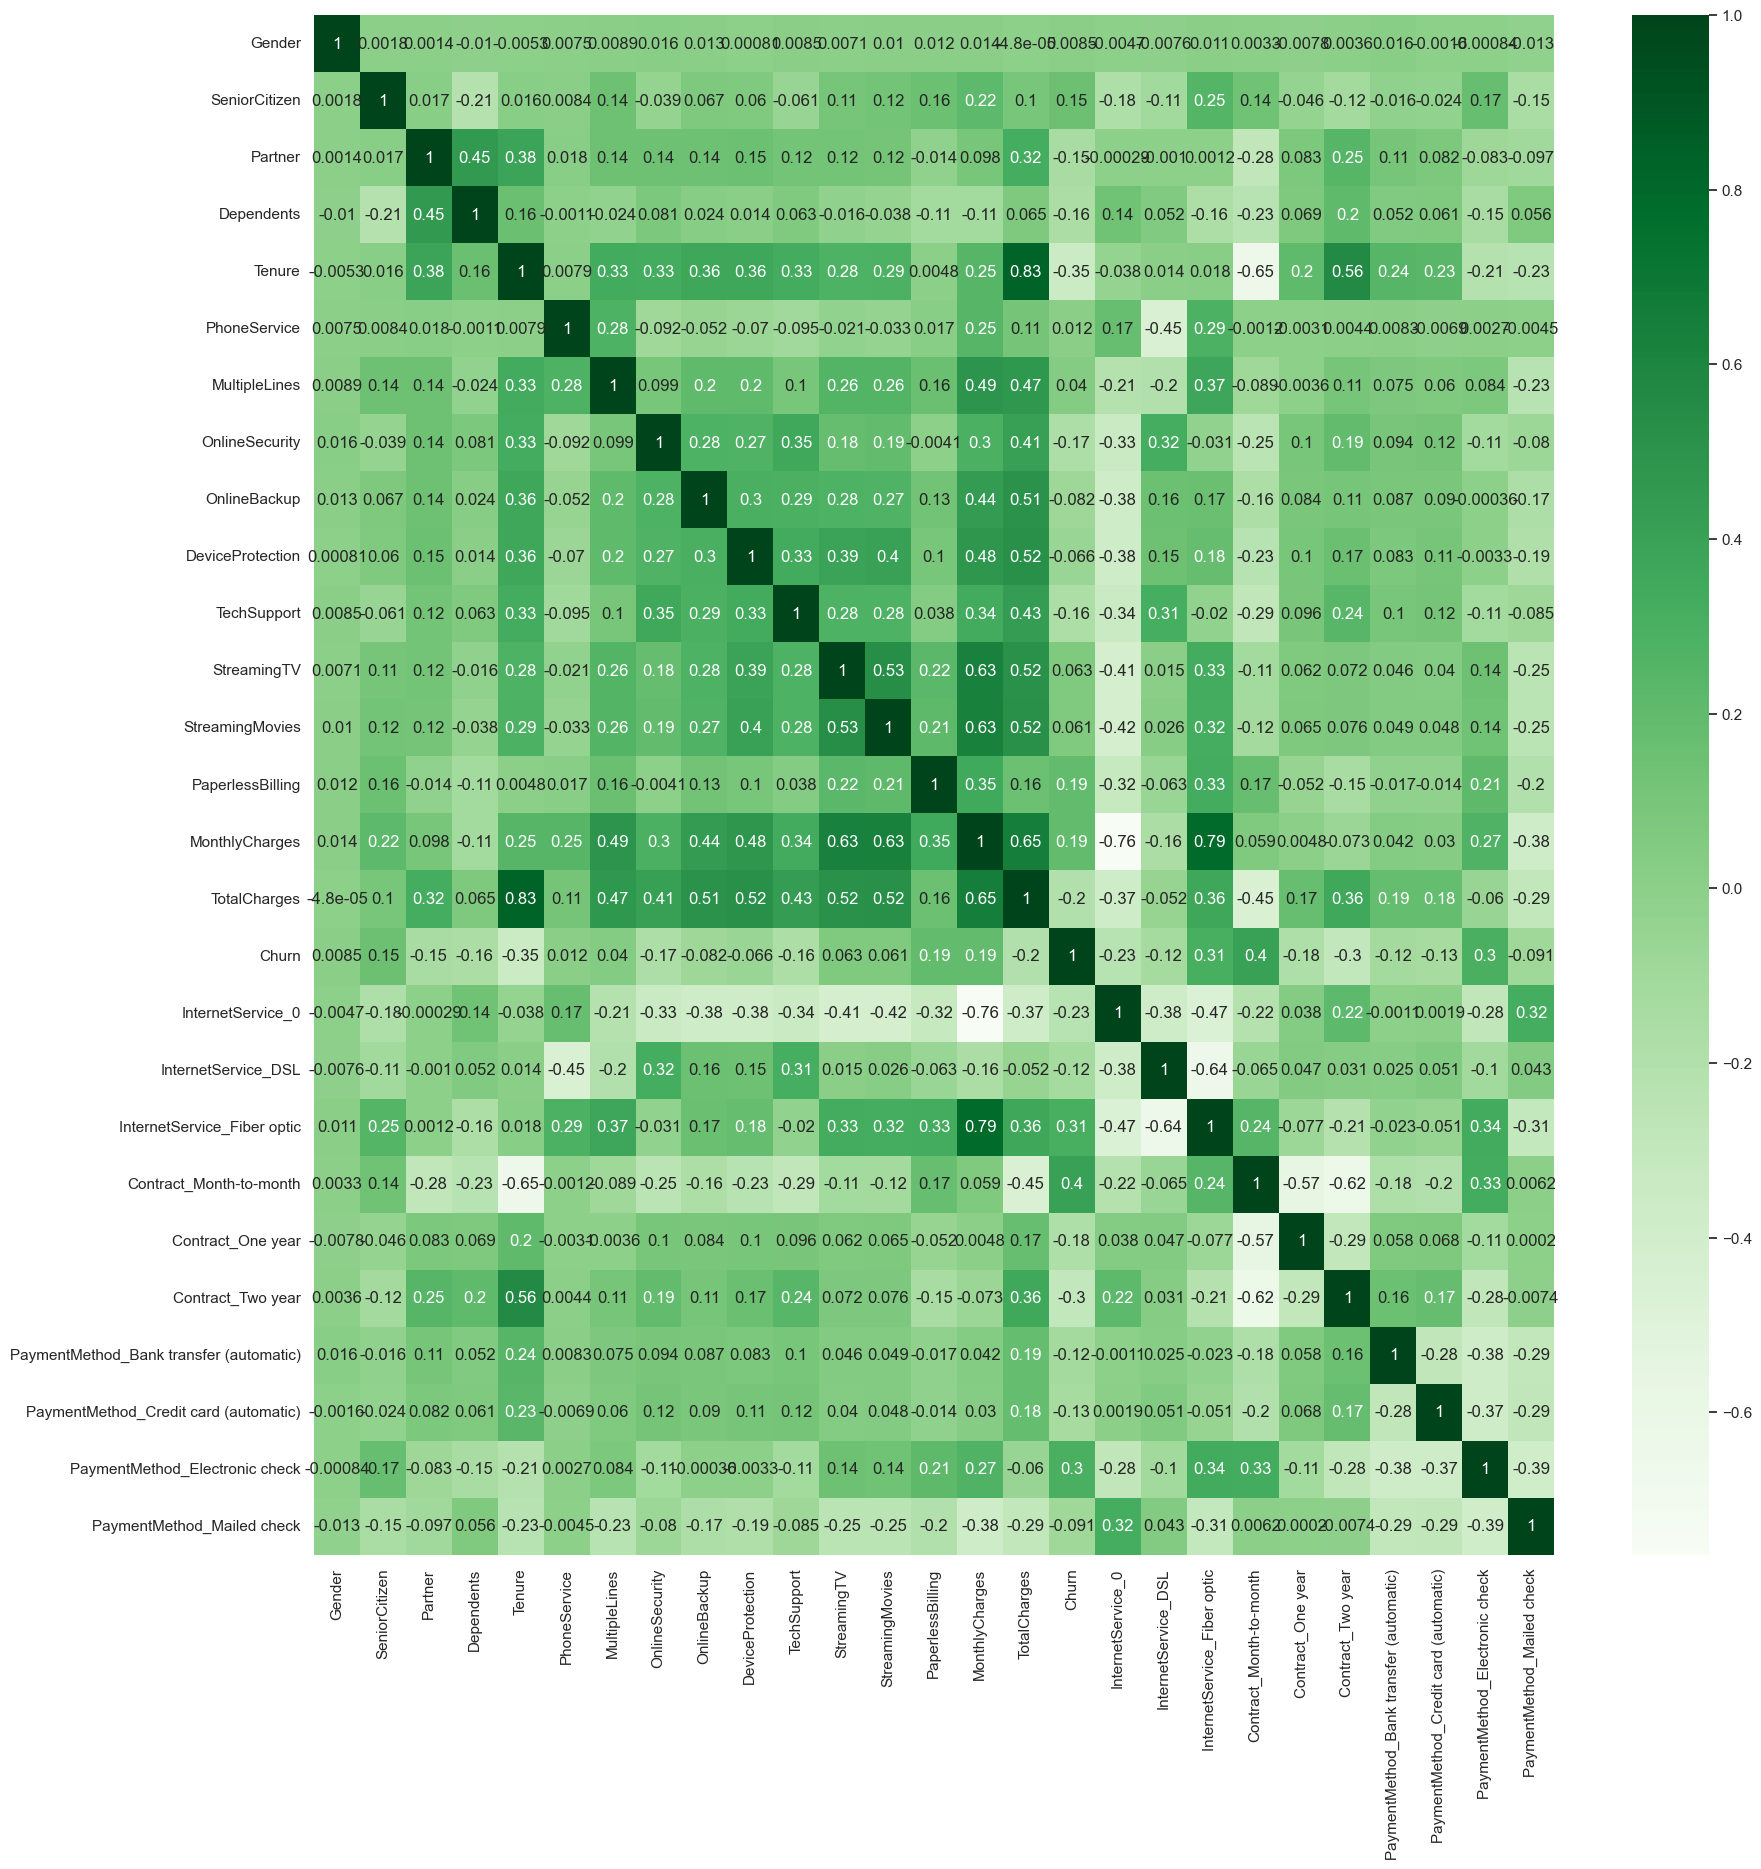

In [50]:
#correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(df_encoded.corr(),annot=True, cmap="Greens")

# 4. Imbalanced data: Oversampling vs Undersampling

Before moving to the model building and deployment, I need to handle the data imbalance. Because majority of customers in the data did not exit from the service (No-Churn), Churn customers - whose target 'Churn' value is 1- are minority in the data set. The imbalance would cause model to learn not so much about minority class, which could be a problem as companies would like to learn more about the minority class from business perspective.

*Oversampling* and *Undersampling* could be used to overcome this issue. Although there are multiple types of sampling techniques we can use, I chose **SMOTE** (Synthetic Minority Oversampling Technique) for oversampling and **RandomUnderSampler** for undersampling. 

(Note) I installed imbalanced-learn by the following code on the anaconda prompt:
***conda install -c conda-forge imbalanced-learn***

In [51]:
#install imbalanced_learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversample = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

In [52]:
X=df_encoded.drop(['Churn'], axis=1)
y=df_encoded['Churn']

In [53]:
X_os, y_os = oversample.fit_resample(X,y)
X_us, y_us = undersample.fit_resample(X,y)

In [54]:
#check the shape of the oversampled data
X_os.shape, y_os.shape

((10326, 26), (10326,))

In [55]:
#check the shape of the undersampled data
X_us.shape, y_us.shape

((3738, 26), (3738,))

In [56]:
#compare the size before oversampling
X.shape, y.shape

((7032, 26), (7032,))

In [57]:
#present the difference between oversampled vs previousd data
#SOurce of the code to present the oversampled data : https://www.kaggle.com/code/arezoodahesh/customer-churn-with-oversampling-techniques

print("============Data before over/undersampling===========")
print("X_shape: {}".format(X.shape))
print("y_shape: {}".format(y.shape))
print("Churn case # : {}".format(sum(y==1)))
print("Nno Churn case # : {}".format(sum(y==0)))      
print("--> Imbalanced. Negative cases were majority")
print("")
print("============After oversampling===========")
print("X_shape: {}".format(X_os.shape))
print("y_shape: {}".format(y_os.shape))
print("Churn case # : {}".format(sum(y_os==1)))
print("No Churn case # : {}".format(sum(y_os==0)))    
print("--> Equal number of Churn/no Churn target classes, increased to 5163 instances per class")
print("")
print("============After undersampling===========")
print("X_shape: {}".format(X_us.shape))
print("y_shape: {}".format(y_us.shape))
print("Churn case # : {}".format(sum(y_us==1)))
print("No Churn case # : {}".format(sum(y_us==0)))    
print("--> Equal number of Churn/no Churn target classes, decreased to 1869 instances per class")

============Data before over/undersampling===========
X_shape: (7032, 26)
y_shape: (7032,)
Churn case # : 1869
Nno Churn case # : 5163
--> Imbalanced. Negative cases were majority

============After oversampling===========
X_shape: (10326, 26)
y_shape: (10326,)
Churn case # : 5163
No Churn case # : 5163
--> Equal number of Churn/no Churn target classes, increased to 5163 instances per class

============After undersampling===========
X_shape: (3738, 26)
y_shape: (3738,)
Churn case # : 1869
No Churn case # : 1869
--> Equal number of Churn/no Churn target classes, decreased to 1869 instances per class


I'm concerned about using the undersampled data because the size of data get too small (5163 vs 1869). It is generally more suggested to use undersampled data than oversampled data because oversampling does not create any new meaningful values. However, **I'll prioritize using oversampled data first and decide on which sampled data to use depending on the difference in performance score**. I'll explore these type of sampled data in the next step.

In [58]:
#Train_test split with the over/undersampled data
#Oversampled data as a default data set

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=42)
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.3, random_state=42)

# 5. Model Building

For the binary classification task, I will explore the following three models. I chose 1. Random Forest and 2. Logistic Regression as they are the most widely-used, fundamental models. I wanted to attempt applying XGBoost as this model turned out to show better performance in many cases with Boosting. For all these models, I chose to apply cross validation = 5. 

1. Random Forest
2. Logistic Regression
3. XGBoost 

For each model,
1. I'll set parameters to explore in GridSearchCV
2. Compare the performance score ***using both oversampled and undersampled data***
3. Choose the data and model with better performance score
4. Present classification report, confusion matrix, and ROC curve for the model with better performance

After exploring with models, I'll compare the model performance together.




### (1) RandomForest 

In [59]:
#Introduce RF classifier
rf = RandomForestClassifier(random_state=42)

In [60]:
#make parameter grid to use for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [61]:
#Apply GridSearchCV to explore the best parameters
#for oversampled data
rf_cv = GridSearchCV(rf,
                     param_grid=parameters,
                     cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [62]:
#Apply GridSearchCV to explore the best parameters
#for undersampled data
rf_cv_us = GridSearchCV(rf,
                     param_grid=parameters,
                     cv=5)

rf_cv_us.fit(X_train_us, y_train_us)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [63]:
print("========Oversampled data=======")
print('Best-working parameters:', rf_cv.best_params_)
print('Best score:', rf_cv.best_score_)
print("========Undersampled data=======")
print('Best-working parameters:', rf_cv_us.best_params_)
print('Best score:', rf_cv_us.best_score_)

========Oversampled data=======
Best-working parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Best score: 0.8143303325723747
========Undersampled data=======
Best-working parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
Best score: 0.7637638112475005


We could see that after the GridSearchCV and applying the best parameters for each case, **oversampled data is better for increasing the Random Forest model performance** in this case of given parameter grid. It is very likely that the decrease in data size significanly affects classification. 
I will use model with oversampled data from now.

In [64]:
#make variable for predicted values
y_pred_rf = rf_cv.predict(X_test)

In [65]:
#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1563
           1       0.78      0.87      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.82      0.81      0.81      3098
weighted avg       0.82      0.81      0.81      3098



<AxesSubplot: >

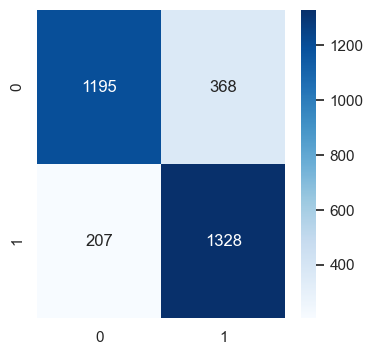

In [66]:
#visualize confusion matrix
sns.set_style('white')

fig,ax=plt.subplots(figsize=(4,4))
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', cmap = 'Blues')

In [67]:
#save score for future comparison
auc_score_rf = roc_auc_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)

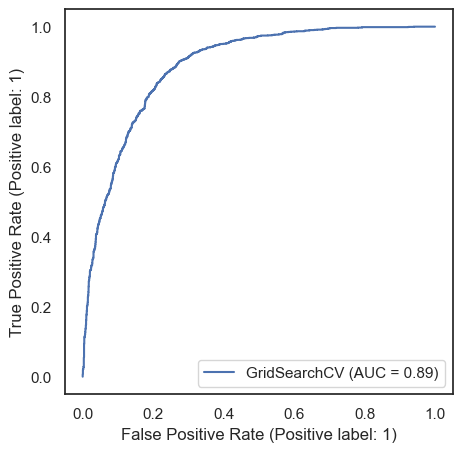

In [68]:
#ROC curve
fig,ax = plt.subplots(figsize=(5,5))
plot_roc_curve(rf_cv, X_test, y_test, ax = ax)


As I'm interested in what features turns out to be of importance by how much, I'll visualize it in the model with the best performance score.

In [69]:
#best_parameter found by GridSearchCV
rf_cv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [70]:
#make model with the best parameters
best_params_rf = rf_cv.best_params_
best_rf = RandomForestClassifier(**best_params_rf)

In [71]:
#fit model
best_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [72]:
#check feature_importances
best_rf.feature_importances_

array([0.01365198, 0.00761889, 0.01582598, 0.02035275, 0.14664822,
       0.00593969, 0.01254517, 0.0348998 , 0.01489933, 0.00970251,
       0.02760792, 0.01210249, 0.01285161, 0.01521184, 0.10909368,
       0.1071071 , 0.03181351, 0.01682711, 0.05724473, 0.13076233,
       0.0398317 , 0.09752068, 0.00988009, 0.01124296, 0.03031196,
       0.00850597])

In [73]:
#get the index of feature importance by significance
indices = np.argsort(best_rf.feature_importances_)[::-1]
indices

array([ 4, 19, 14, 15, 21, 18, 20,  7, 16, 24, 10,  3, 17,  2, 13,  8,  0,
       12,  6, 11, 23, 22,  9, 25,  1,  5], dtype=int64)

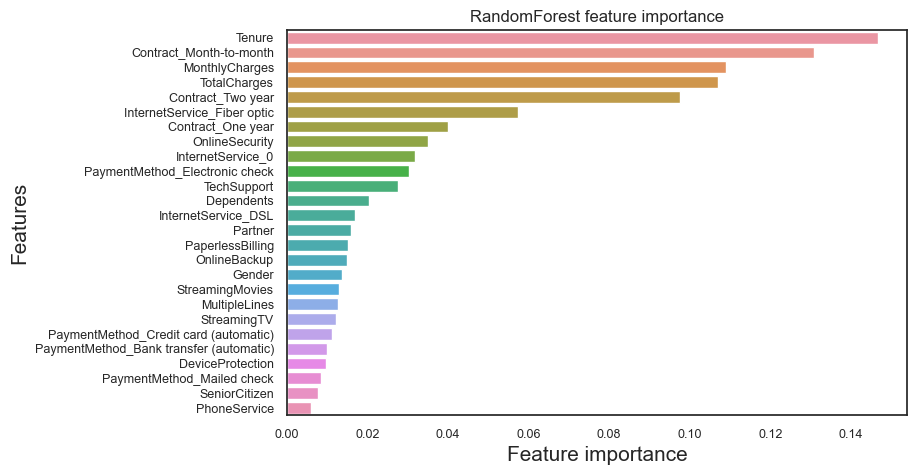

In [74]:
#Visualize the feature importance in the random forest model in bar plot

plt.subplots(figsize=(8, 5))
g = sns.barplot(y=X.columns[indices], x = best_rf.feature_importances_[indices], orient='h')
g.set_xlabel("Feature importance",fontsize=15)
g.set_ylabel("Features",fontsize=15)
g.tick_params(labelsize=9)
g.set_title("RandomForest feature importance");

One of the strength of the Random Forest model is that it clearly shows which decision factors were considered more importantly throughout the machine learning task. According to the visualization above, **'Tenure', Whether having 'Contract_Month-to-Month', 'MonthlyCharges'** and **'TotalCharges'** are among the critical decision factors that the model utilizes for classification

### (2) Logistic Regression 

I will proceed with the similar model introduction, deployment for the logistic regression model

In [75]:
#Introduce Logistic classifier
logistic = LogisticRegression(random_state=42)

In [76]:
#set parameter grid for GridSearch
parameters = {
    'penalty': ['l1', 'l2'],
    'C':[0.01,1,100],
    'max_iter': [500, 1000],
    'solver'  : ['liblinear']
}

In [77]:
#Apply GridSearchCV to explore the best parameters
#for oversampled data
logistic_cv = GridSearchCV(logistic,
                     param_grid=parameters,
                     cv=5)

logistic_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 1, 100], 'max_iter': [500, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [78]:
#Apply GridSearchCV to explore the best parameters
#for undersampled data
logistic_cv_us = GridSearchCV(logistic,
                     param_grid=parameters,
                     cv=5)

logistic_cv_us.fit(X_train_us, y_train_us)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 1, 100], 'max_iter': [500, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [79]:
print("========Oversampled data=======")
print('Best-working parameters:', logistic_cv.best_params_)
print('Best score:', logistic_cv.best_score_)
print("========Undersampled data=======")
print('Best-working parameters:', logistic_cv_us.best_params_)
print('Best score:', logistic_cv_us.best_score_)

========Oversampled data=======
Best-working parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8114255768209164
========Undersampled data=======
Best-working parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7603213988586108


Similar to the RandomForest classifier case, the logistic model with the oversampled data performs better here. I'll use the model with better performance score from now.

In [80]:
#make variable for predicted values
y_pred_logistic = logistic_cv.predict(X_test)


In [81]:
#Classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1563
           1       0.79      0.84      0.81      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



<AxesSubplot: >

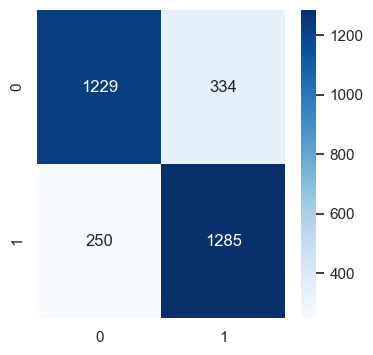

In [82]:
#visualize confusion matrix
sns.set_style('white')

fig,ax=plt.subplots(figsize=(4,4))
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='g', cmap = 'Blues')

In [83]:
#save score for future comparison
auc_score_logistic = roc_auc_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)
accuracy_score_logistic = accuracy_score(y_test, y_pred_logistic)



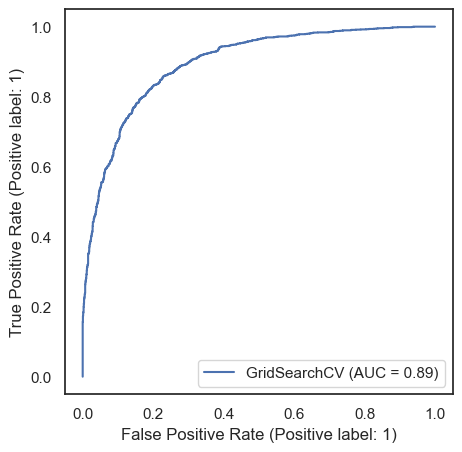

In [84]:
#ROC curve
fig,ax = plt.subplots(figsize=(5,5))
plot_roc_curve(logistic_cv, X_test, y_test, ax = ax)

### (3) XGboost

Deploy XGboost model in a similar way:

In [85]:
# Creating model object
# set object as binary:logistic
# logistic regression for binary classification, output probability
xgb = XGBClassifier(objective = "binary:logistic", random_state=42)

In [86]:
parameters = {
    'max_depth': [2, 4, 6],
    'learning_rate':[0.01, 0.1, 0.3]
    #subsample
}

In [87]:
#Apply GridSearchCV to explore the best parameters
#for oversampled data
xgb_cv = GridSearchCV(xgb,
                     param_grid=parameters,
                     cv=5)

xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [88]:
#Apply GridSearchCV to explore the best parameters
#for undersampled data
xgb_cv_us = GridSearchCV(xgb,
                     param_grid=parameters,
                     cv=5)

xgb_cv_us.fit(X_train_us, y_train_us)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [89]:
print("========Oversampled data=======")
print('Best-working parameters:', xgb_cv.best_params_)
print('Best score:', xgb_cv.best_score_)
print("========Undersampled data=======")
print('Best-working parameters:', xgb_cv_us.best_params_)
print('Best score:', xgb_cv_us.best_score_)

========Oversampled data=======
Best-working parameters: {'learning_rate': 0.3, 'max_depth': 6}
Best score: 0.8177913059292548
========Undersampled data=======
Best-working parameters: {'learning_rate': 0.1, 'max_depth': 2}
Best score: 0.7652934479587816


Again, the model with oversampled data performs better than undersampled data here. I will present results of oversampled data from now.

In [90]:
#make variable for predicted values
y_pred_xgb = xgb_cv.predict(X_test)

In [91]:
#Classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1563
           1       0.81      0.86      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



<AxesSubplot: >

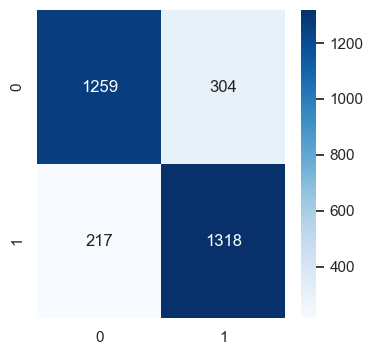

In [92]:
#visualize confusion matrix
sns.set_style('white')

fig,ax=plt.subplots(figsize=(4,4))
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g', cmap = 'Blues')

In [93]:
#save score for future comparison
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)



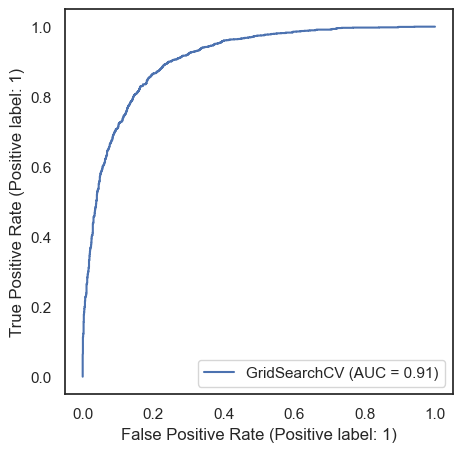

In [94]:
#ROC curve
fig,ax = plt.subplots(figsize=(5,5))
plot_roc_curve(xgb_cv, X_test, y_test, ax = ax)

### Model performance comparison (1) - (3)

In order to compare model performances all together, I made a dataframe from the previous stored values. This could be useful if there are multiple models and could be made into function form as it requires iterative process.

I chose to compare roc_auc score, f1 score and accuracy score.
Although I only exmined three models with limited parameters, model performance seems to be better in the following order in all three evaluation measure. 

1. XGBOOST
2. Random Forest
3. Logistic Regression

In [95]:
#Make dataframe to compare scores
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'XGBoost'],
    'roc_auc_score' :[auc_score_rf, auc_score_logistic, auc_score_xgb],
    'f1_score' : [f1_score_rf, f1_score_logistic, f1_score_xgb],
    'accuracy_score' : [accuracy_score_rf, accuracy_score_logistic, accuracy_score_xgb]
    })

models

,Model,roc_auc_score,f1_score,accuracy_score
0,Random Forest,0.814851,0.822037,0.814396
1,Logistic Regression,0.811721,0.814838,0.811491
2,XGBoost,0.832067,0.834970,0.831827


# 6. Error Analysis


Here, I explored on the distribution of the subset of the test data that is incorrectly predicted for each model. By checking their distribution by each column, I noted which features are likely to be relevant to erroneous classification.

First, I make the dataframe for the subset of data that each model incorrectly predicted.

In [96]:
#prepare the y_test data
y_test_array = (y_test).to_numpy()
y_test_array

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [97]:
#data subset incorrectly predicted by random forest model
error_rf = X_test[y_test_array != y_pred_rf]
error_rf.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
335,0,0,1,1,0.943662,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
3127,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2025,0,0,0,1,0.014085,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
6128,1,0,0,0,0.056338,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
9850,0,0,1,1,0.981668,1,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [98]:
#Likewise for logistic and xgboost model
error_logistic = X_test[y_test_array != y_pred_logistic]
error_xgb = X_test[y_test_array != y_pred_xgb]

In [99]:
#extract the correct target values for incorrectly-predicted data set
error_rf_target = y_test[y_test_array != y_pred_rf]
error_log_target = y_test[y_test_array != y_pred_logistic]
error_xgb_target = y_test[y_test_array != y_pred_xgb]

error_rf['Churn'] = error_rf_target.values
error_logistic['Churn'] = error_log_target.values
error_xgb['Churn'] = error_xgb_target.values

In [100]:
#Combine with the correct target value
error_rf.assign(Churn= error_rf_target.values) 
error_logistic.assign(Churn= error_log_target.values) 
error_xgb.assign(Churn= error_xgb_target.values) 

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
335,0,0,1,1,0.943662,1,1,0,1,1,...,1,0,0,1,0,1,0,0,0,1
3127,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9850,0,0,1,1,0.981668,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,1
3370,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7578,0,0,0,0,0.971646,1,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,0,0,1,0,0.450704,1,1,0,1,1,...,0,1,1,0,0,0,0,1,0,0
3562,1,0,0,0,0.281690,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
3457,0,0,0,0,0.507042,1,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
7682,1,0,0,0,0.042254,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1


In [101]:
#check the shape of data
error_rf.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
335,0,0,1,1,0.943662,1,1,0,1,1,...,1,0,0,1,0,1,0,0,0,1
3127,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2025,0,0,0,1,0.014085,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,0
6128,1,0,0,0,0.056338,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
9850,0,0,1,1,0.981668,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,1


I will draw distribution plot for each column, for each incorrectly-predicted data set.
As there are multiple columns, I'll divide columns into 4 groups for convenience in displaying. Here, 3 groups are categorical (binary) and 1 group is numerical column. To do this, I made a list of column names, exclude numerical columns, and then divide into three categorical column groups.

In [102]:
#extract categorical values
numeric_col = ['Tenure', 'MonthlyCharges', 'TotalCharges']

#List of binary columns
error_rf_categorical= [ elem for elem in list(error_rf.columns) if elem not in numeric_col]


In [103]:
#First group of binary column
col_1 = list(error_rf_categorical[:8])
col_1

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup']

In [104]:
#Second group of binary column
col_2 = list(error_rf_categorical[8:16])
col_2

['DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService_0',
 'InternetService_DSL',
 'InternetService_Fiber optic']

In [105]:
#Third group of binary column
col_3 = list(error_rf_categorical[16:23])
col_3

['Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In the following graphs, I took a look at the distribution of each columns and see how they are different from the distribution observed in the beginning stage of data exploration. Although it is somewhat hypothetical, there are some information that could be relevant to the origin of errors. 

### **Observations about errors** 

### (1) Random Forest

Among the incorrecetly predicted data, following are the tendency observed which reverses the general trend in the original data

1. Customers with partners and dependents had unexpected high churn rate
2. Among those subscribed to Online Security, Online Backup, Device protection, Tech support, there are no difference in the probability of churn
3. There are some greater percentage of incorrect classification in the customer group who had month-to-month contract but did not churn
4. Payment methods seem to be not meaningful for classification


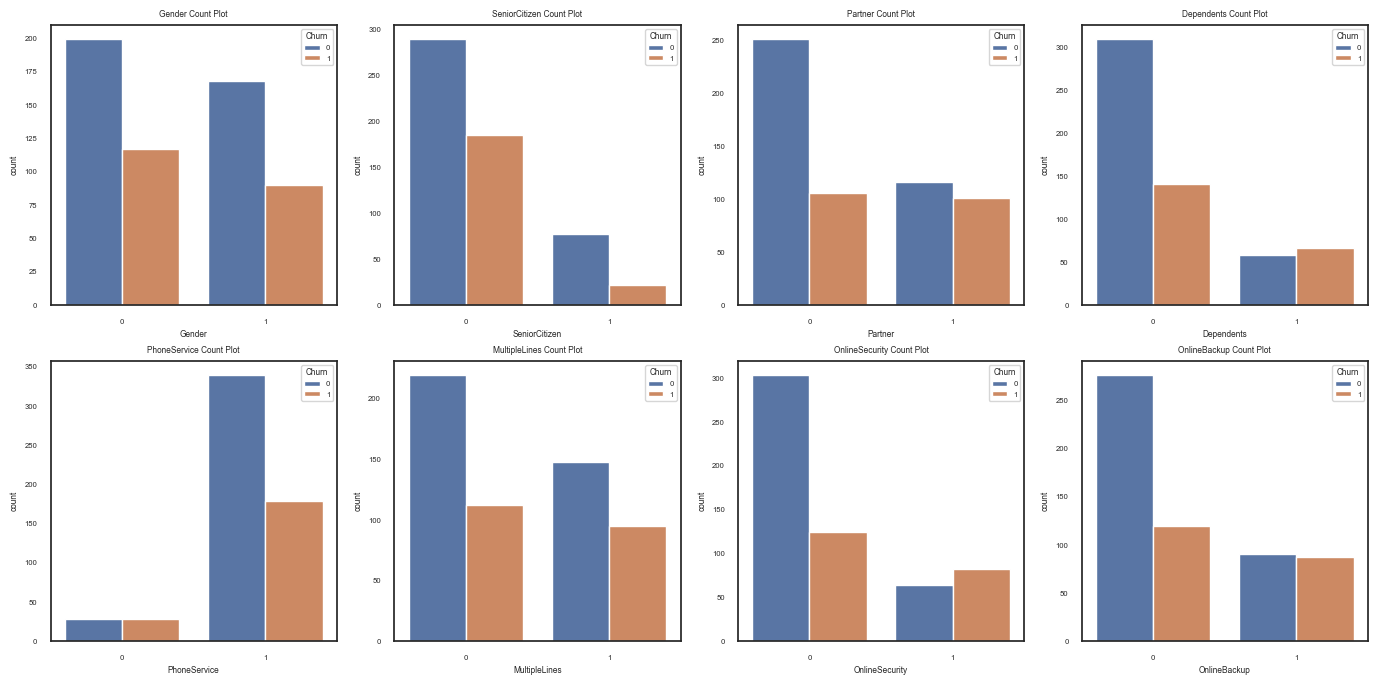

In [106]:
# From incorrectly predicted data 
# Group 1

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_1):
        sns.countplot(
                     data=error_rf,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

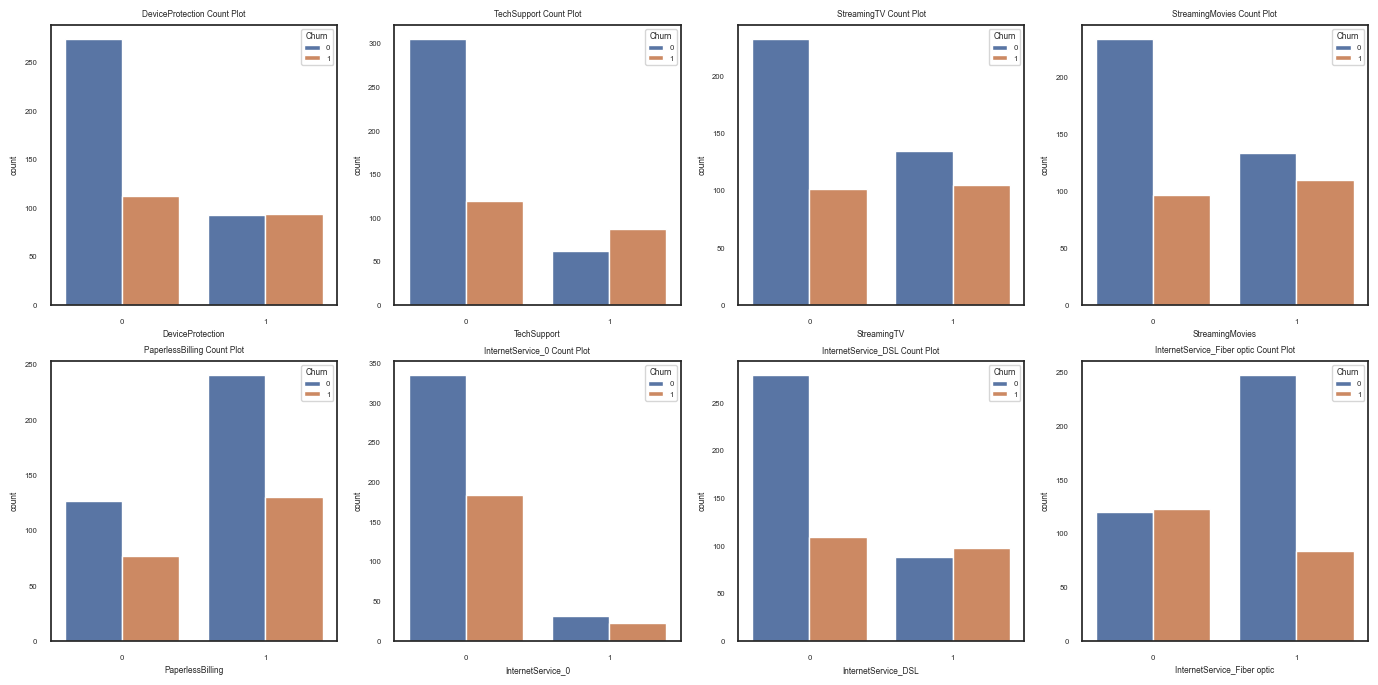

In [107]:
# From incorrectly predicted data 
# Group 2

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_2):
        sns.countplot(
                     data=error_rf,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

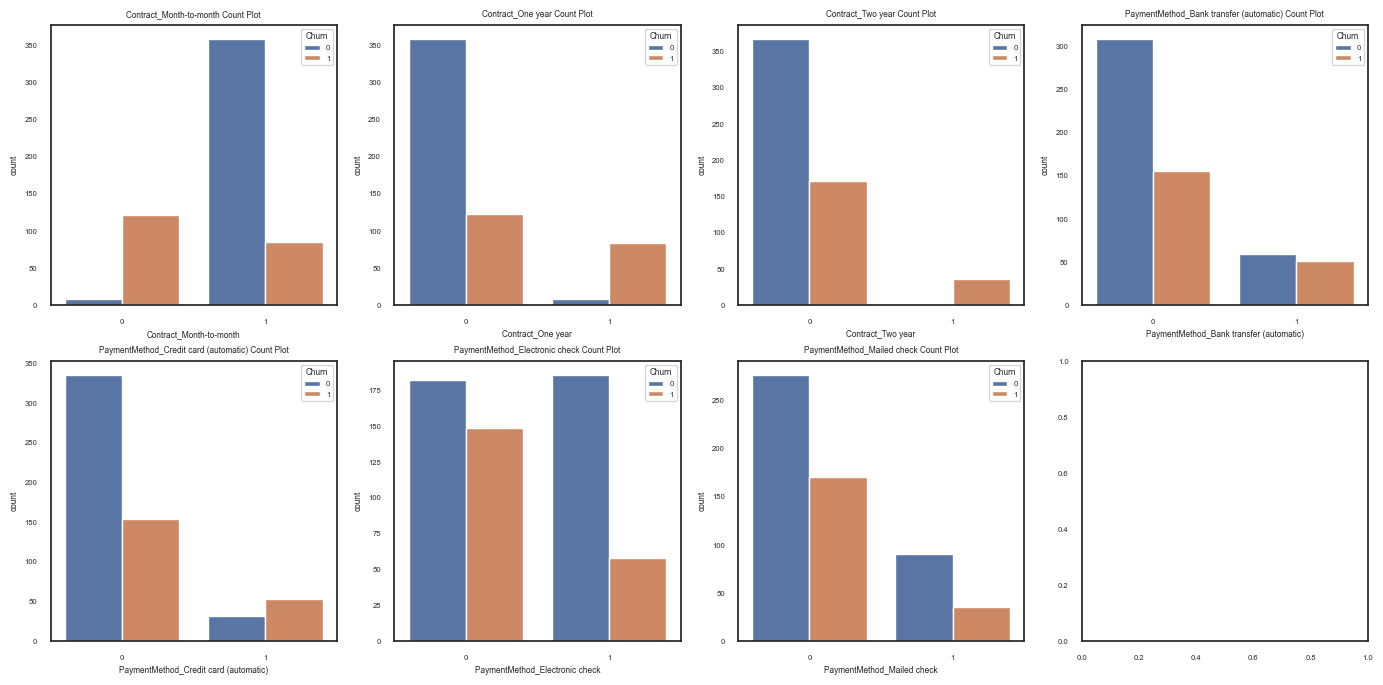

In [108]:
# From incorrectly predicted data 
# Group 3

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_3):
        sns.countplot(
                     data=error_rf,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

I repeated the same process for the two other models and make a note of the noticeable difference in distribution

### (2) Logistic Regression 

Compared with the data distribution of the original data, following trends are are different

* There are more senior citizens who are not correctly classified. Perhaps it is due to the lack of information about senior customers
* Logistic regression was not successful in correctly classifying customer with Partner or with dependents, to greater extent that Random Forest
* The model is likely to make erroneous prediction for customers with Fiber optic internet service - which as actually highly associate with high churn rate

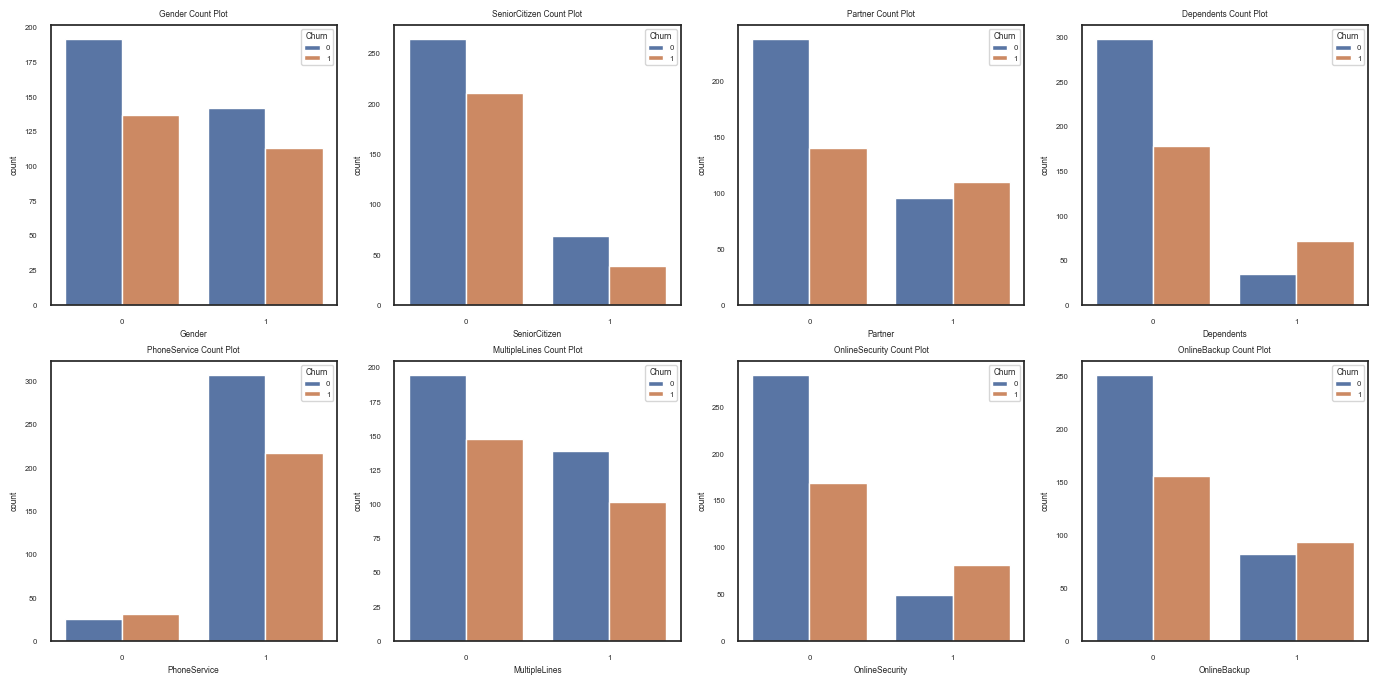

In [109]:
# From incorrectly predicted data 
# Group 1

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_1):
        sns.countplot(
                     data=error_logistic,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

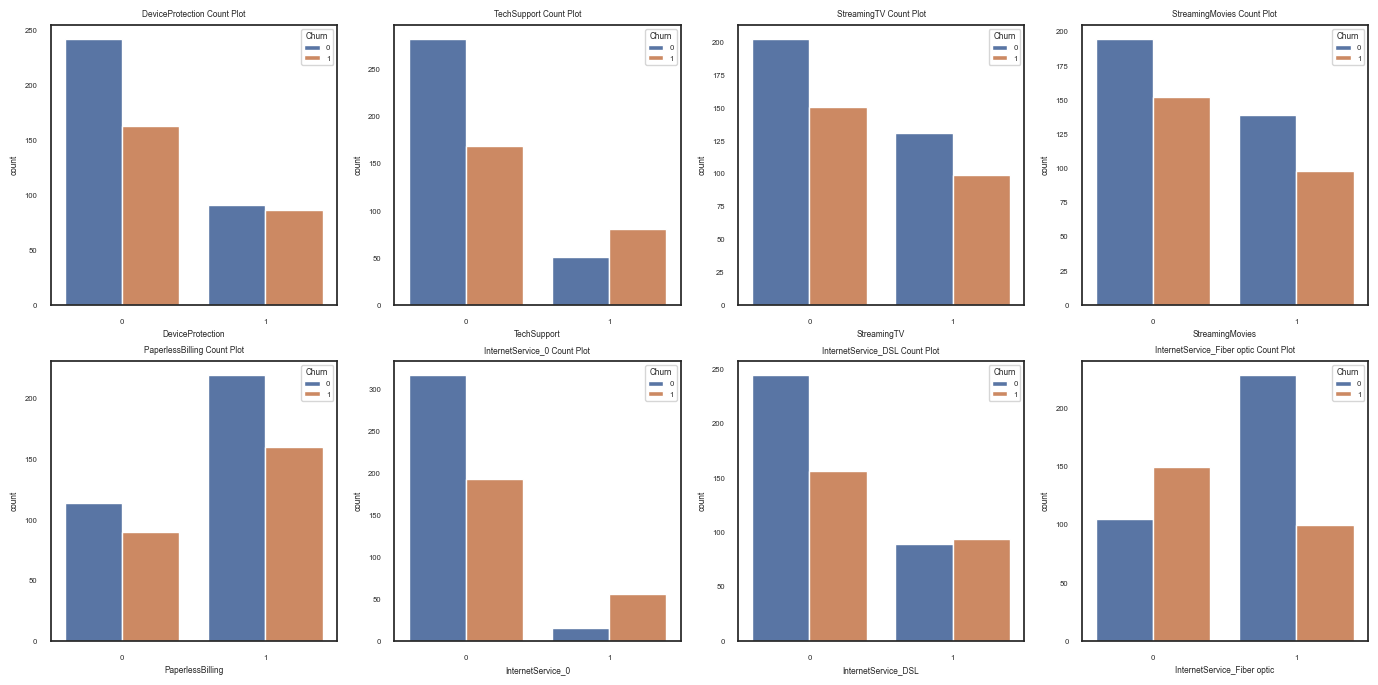

In [110]:
# From incorrectly predicted data 
# Group 2

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_2):
        sns.countplot(
                     data=error_logistic,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

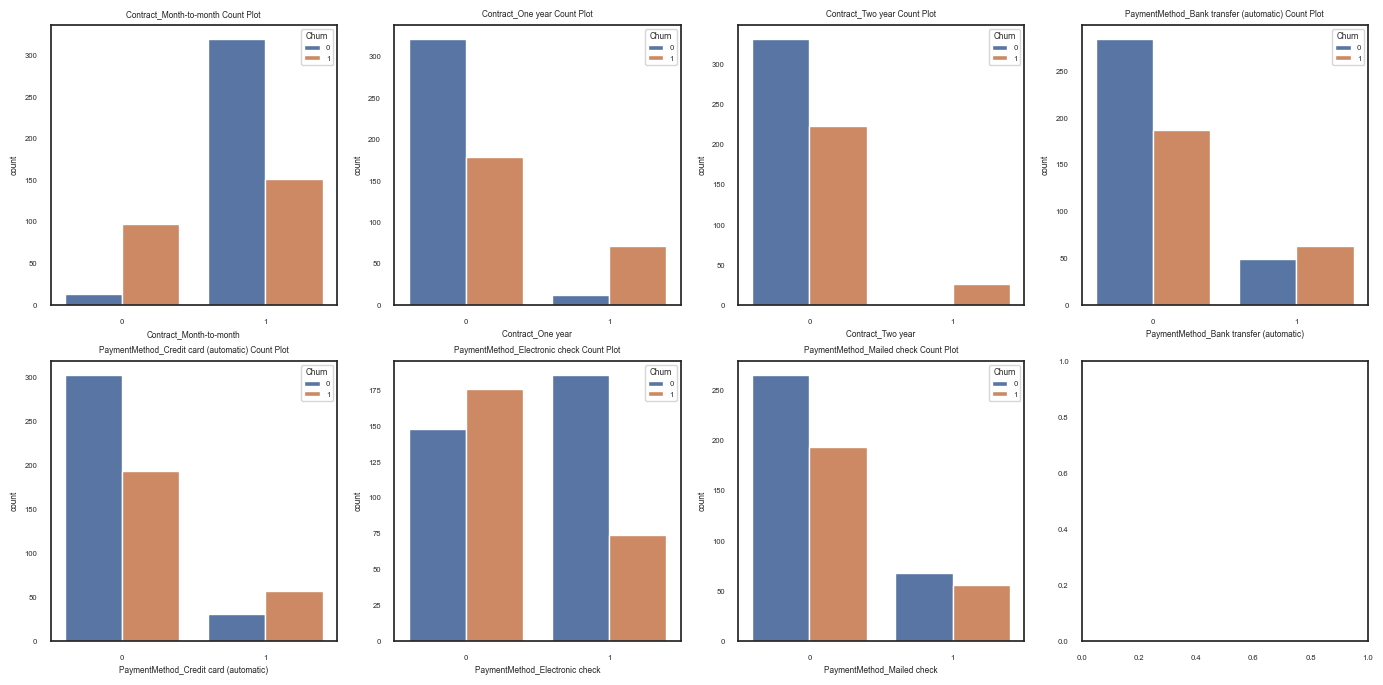

In [111]:
# From incorrectly predicted data 
# Group 3

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_3):
        sns.countplot(
                     data=error_logistic,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

### (3) XGboost

The errors observed in the XGboost is very similar to the Random Forest and Logistic Regression model case. The major difference is the number of error cases are smaller than Logistic and Random Forest models. It aligns with the XGboost model's higher model performance score.

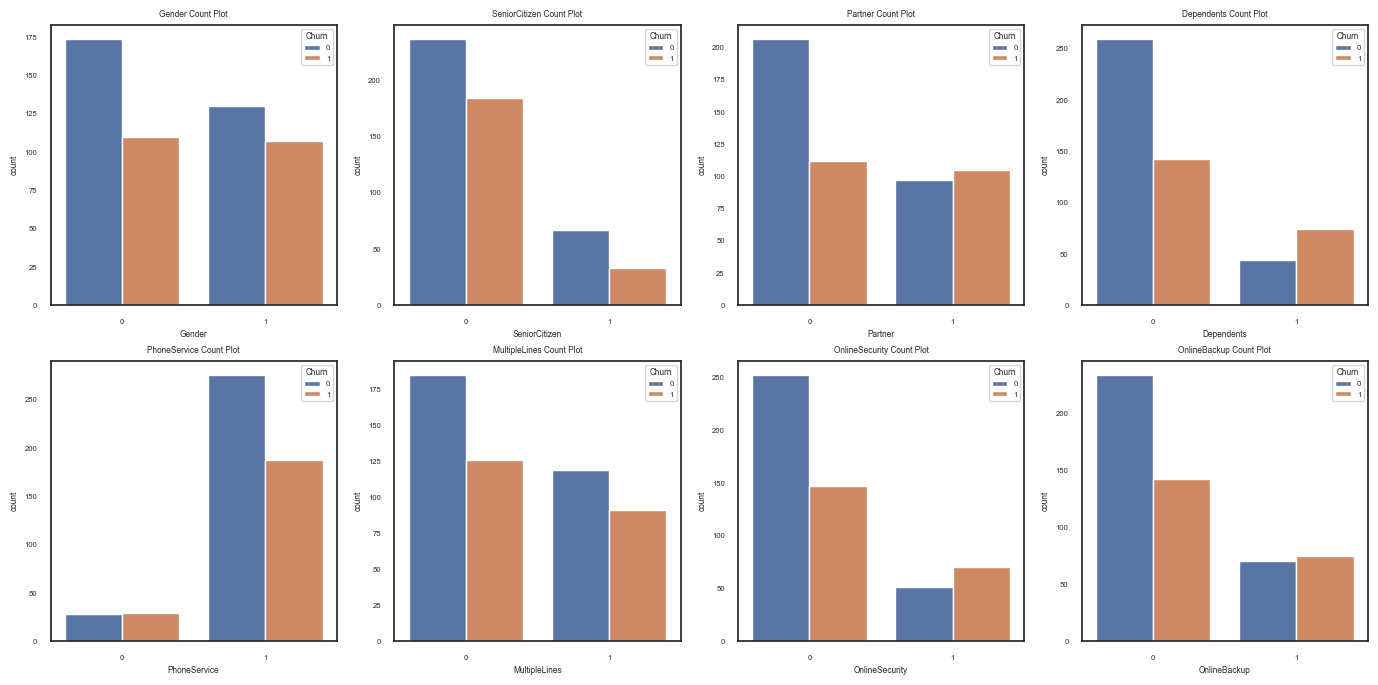

In [112]:
# From incorrectly predicted data 
# Group 1

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_1):
        sns.countplot(
                     data=error_xgb,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

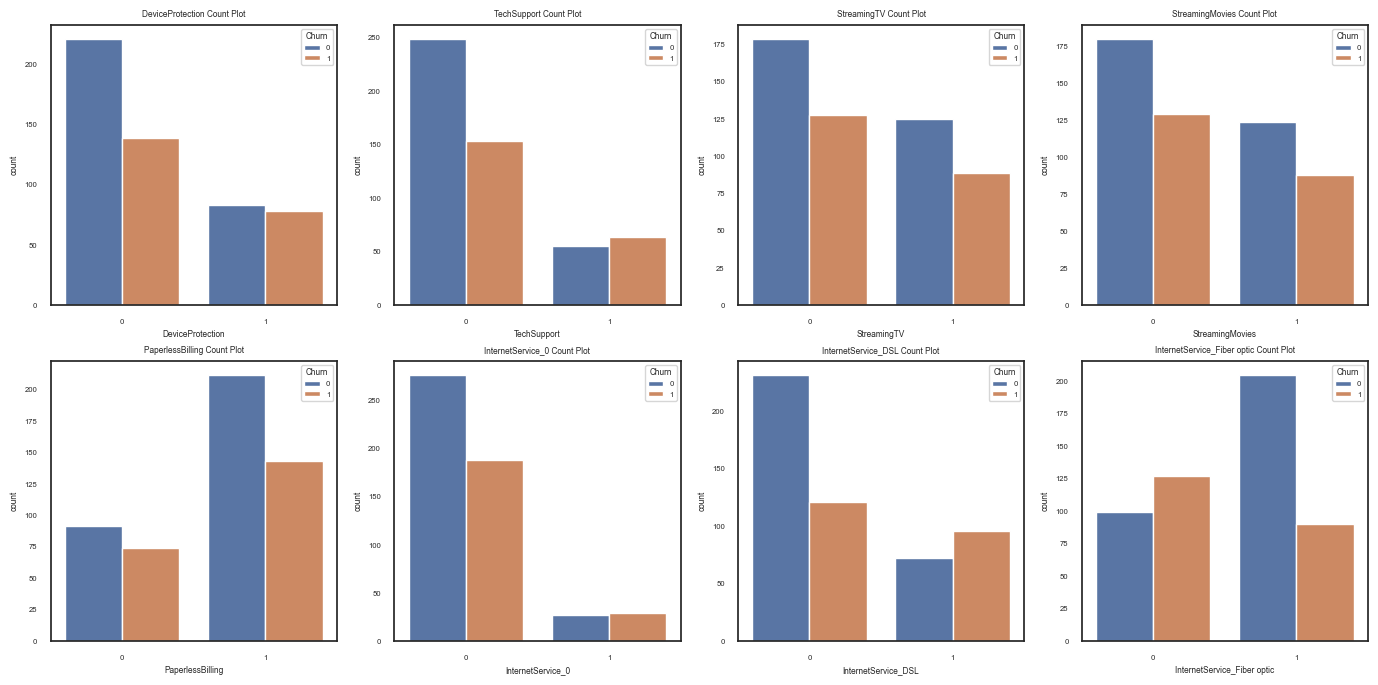

In [113]:
# From incorrectly predicted data 
# Group 2

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_2):
        sns.countplot(
                     data=error_xgb,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

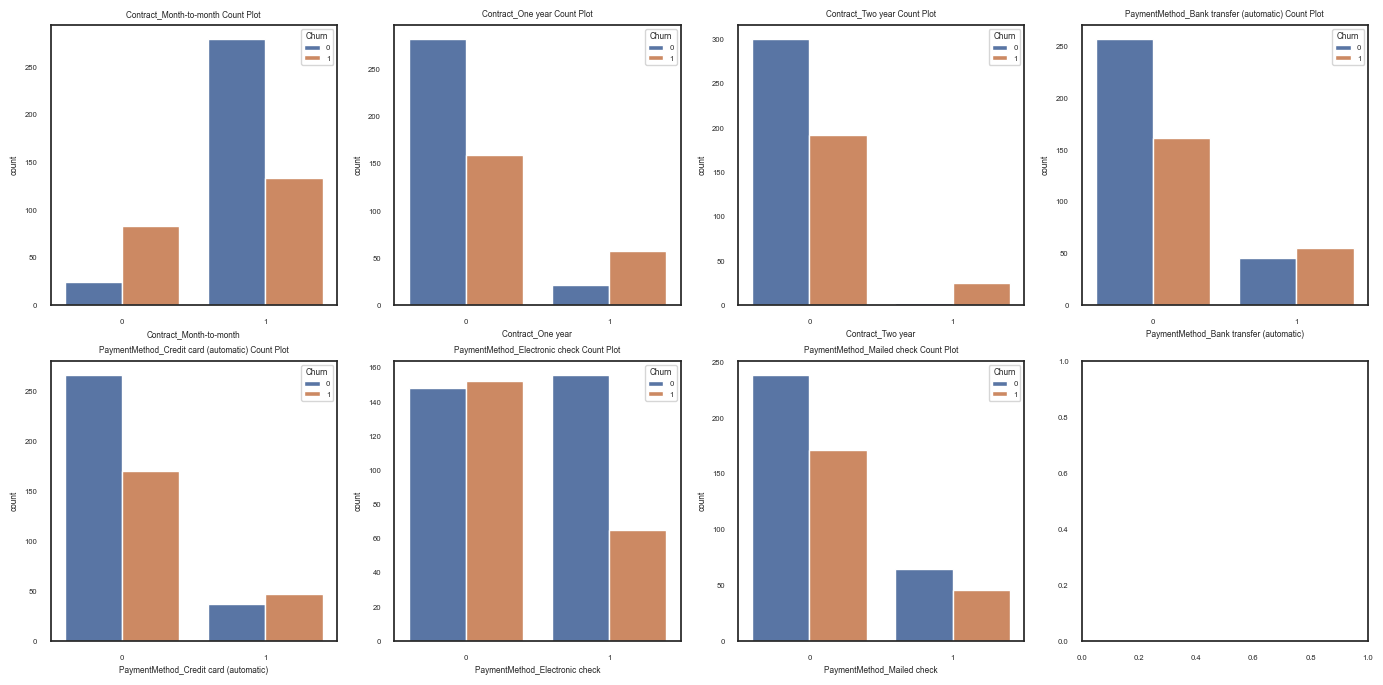

In [114]:
# From incorrectly predicted data 
# Group 3

sns.set(font_scale=0.5, style="white")
fig , ax = plt.subplots(2,4,figsize=(17,8))
for i , col in enumerate(col_3):
        sns.countplot(
                     data=error_xgb,
                      x=col,
                      ax=ax[i//4, i%4],
                      hue='Churn'
                    
                      )
        ax[i//4, i%4].set_title(f'{col} Count Plot')

plt.show()

### Error Analysis Summary
In general, the model seems to make classification largely depending on
* Whether the customer has either partner or dependents (if yes, less likely to churn)
* Whether the customer uses Online security, Online backup, Device protection, Tech support service (if yes, less likely to churn)
* Whether the customer uses Fiber optic internet service (if yes, more likely to churn)
* Whether the customer uses credit card as payment method (if yes, more likely to churn)

***Three models are seemed to make similar errors for the cases that does not follow the general trend mentioned above.*** For example, it makes major mistakes in classifying the not-churn customer without dependents/partner.

Also, it seems that following columns are do not provide meaningful information to help classification. Thus, models are not so effective in distinguishing churn/not-churn group depending on these features
* Streaming TV/Movies
* Internet service other than Fiber optic
* Payment method other than credit card

In order to increase the model performance significantly, it would be important to provide with more distinguishable information where the customer churn is strongly associated with.





# Wrapping up: Limitation of the project

It should be noted that the project has limitation as the following, but not limited to:
* Explored just a few parameters due to the required time for computation,
* Small size of data was available for training of the classification task.
    - Even after oversampling, there were 10326 instances of data, which is of small size.
* Errors were examined only by comparing distribution of each column with the original data set
     - More effective error analyses would be possible
 


*End of the document*